In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter


Starter vs DNF Counts by Year:
    year  total_starters  total_dnfs  finishers
0  2021            5752        2130       3622
1  2022           10752        3300       7452
2  2023           14552        3738      10814
3  2024            9052        2572       6480
4  2025            7520        1670       5850


<Figure size 800x600 with 0 Axes>

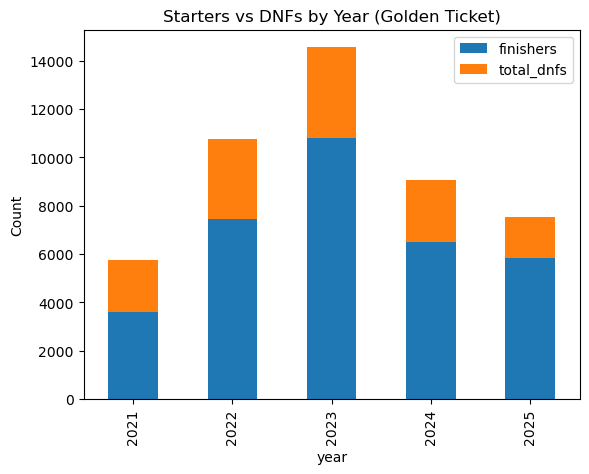

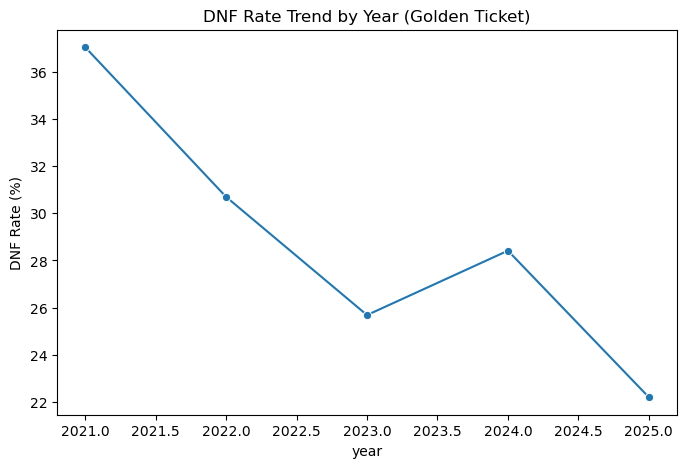


Average DNF Rate by Gender:
   gender  dnf_rate_pct
0      F     28.893846
1      M     27.650769


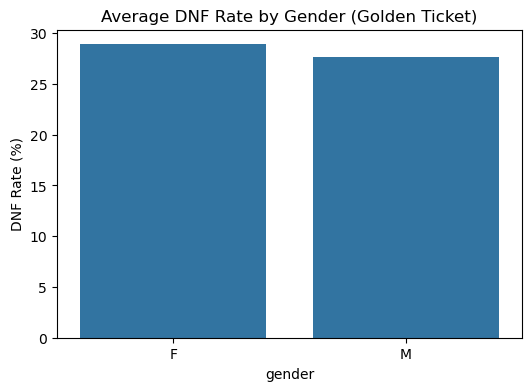


Top 10 Races by DNF Rate:
 race_name
Doi Inthanon        45.0
Javelina            39.0
UTMB                36.0
Grindstone          29.0
CCC                 27.0
Nice Cote d Azur    26.0
The Canyons         23.0
Chianti (UTCC)      22.0
Black Canyon        21.0
Bandera             21.0
Tarawera            11.0
Name: dnf_rate_pct, dtype: float64


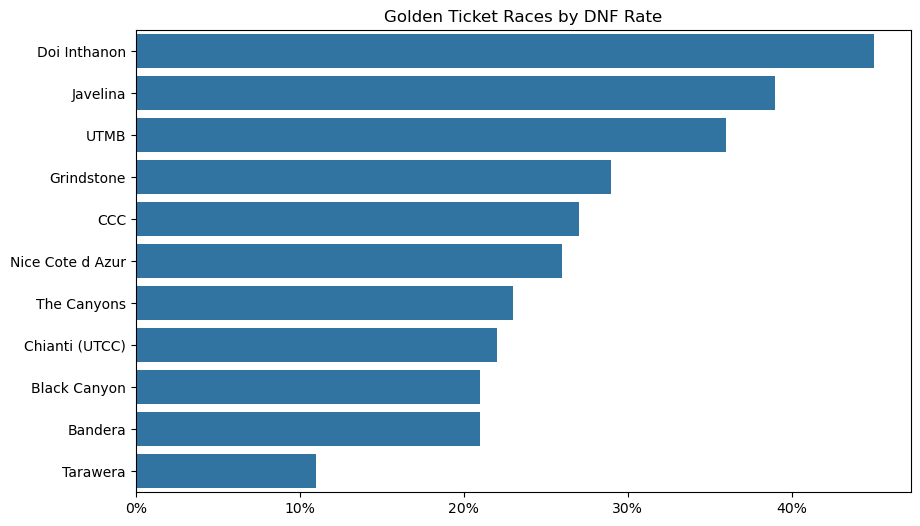


Average DNF Rate by Race Type:
            race_type  dnf_rate_pct
0      Golden Ticket     28.141667
1  Non-Golden Ticket     24.910185


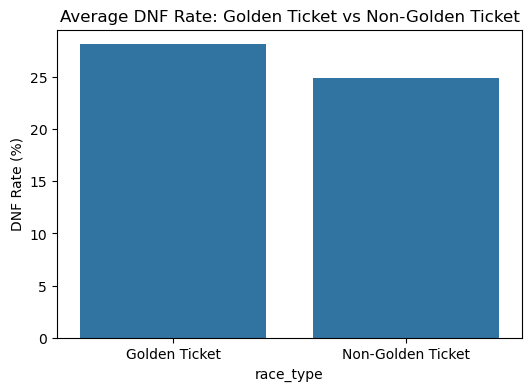

In [3]:
# File path for dnf_starter_metrics
df = pd.read_csv("../data/sql_backup_queries_csv/csv/dnf_starter_metrics.csv")


# Filter Golden Ticket races
gt_df = df[df["race_type"] == "Golden Ticket"]

# 1. Starter vs DNF counts by year (Golden Ticket only)
starter_dnf_year = gt_df.groupby("year").agg(
    total_starters=("total_starters", "sum"),
    total_dnfs=("total_dnfs", "sum")
).reset_index()
starter_dnf_year["finishers"] = starter_dnf_year["total_starters"] - starter_dnf_year["total_dnfs"]

print("\nStarter vs DNF Counts by Year:\n", starter_dnf_year)

plt.figure(figsize=(8,6))
starter_dnf_year.plot(x="year", y=["finishers", "total_dnfs"], kind="bar", stacked=True)
plt.title("Starters vs DNFs by Year (Golden Ticket)")
plt.ylabel("Count")
plt.show()

# 2. DNF rate trend by year
starter_dnf_year["dnf_rate_pct"] = (starter_dnf_year["total_dnfs"] / starter_dnf_year["total_starters"]) * 100

plt.figure(figsize=(8,5))
sns.lineplot(data=starter_dnf_year, x="year", y="dnf_rate_pct", marker="o")
plt.title("DNF Rate Trend by Year (Golden Ticket)")
plt.ylabel("DNF Rate (%)")
plt.show()

# 3. DNF rate by gender for Golden Ticket races
gender_dnf = gt_df.groupby("gender")["dnf_rate_pct"].mean().reset_index()
gender_dnf = gender_dnf[gender_dnf["gender"].isin(["F","M"])]  # exclude Overall

print("\nAverage DNF Rate by Gender:\n", gender_dnf)

plt.figure(figsize=(6,4))
sns.barplot(data=gender_dnf, x="gender", y="dnf_rate_pct")
plt.title("Average DNF Rate by Gender (Golden Ticket)")
plt.ylabel("DNF Rate (%)")
plt.show()

# 4. DNF rate by race (All: There are only 11)
def to_percent(x, _):
    return f"{x * 1:.0f}%"

race_dnf = round(gt_df.groupby("race_name")["dnf_rate_pct"].mean().sort_values(ascending=False).head(11), 0)

print("\nTop 10 Races by DNF Rate:\n", race_dnf)

plt.figure(figsize=(10,6))
sns.barplot(x=race_dnf.values, y=race_dnf.index)
plt.title("Golden Ticket Races by DNF Rate")
plt.xlabel("")
plt.ylabel("")
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent))
plt.show()

# 5. Compare average DNF rate for Golden Ticket vs Non-Golden Ticket races
avg_dnf_by_type = df.groupby("race_type")["dnf_rate_pct"].mean().reset_index()

print("\nAverage DNF Rate by Race Type:\n", avg_dnf_by_type)

plt.figure(figsize=(6,4))
sns.barplot(data=avg_dnf_by_type, x="race_type", y="dnf_rate_pct")
plt.title("Average DNF Rate: Golden Ticket vs Non-Golden Ticket")
plt.ylabel("DNF Rate (%)")
plt.show()


# Golden Ticket Race Totals (Starters / DNFs / Finishers)

In [60]:
# File path for dnf_starter_metrics
df = pd.read_csv("../data/sql_backup_queries_csv/csv/dnf_starter_metrics.csv")

# Filter main df for GT races
gt_df = df[df["race_type"] == "Golden Ticket"]

#Filter for gender = Overall
gt_df_filtered = gt_df[gt_df["gender"] == "Overall"]

# Filter for Non-Golden Ticket races and Overall gender
gt_df_filtered = gt_df[
    (gt_df["race_type"] == "Golden Ticket") &
    (gt_df["gender"] == "Overall")
]

# Group and aggregate
gt_starter_dnf_race = gt_df_filtered.groupby(["year", "race_name"]).agg(
    total_starters=("total_starters", "sum"),
    total_dnfs=("total_dnfs", "sum")
).reset_index()

# Calculate finishers
gt_starter_dnf_race["finishers"] = (
    gt_starter_dnf_race["total_starters"] - gt_starter_dnf_race["total_dnfs"]
)

gt_starter_dnf_race = gt_starter_dnf_race.sort_values(by = ['race_name', 'year']).reset_index(drop = True)

print("Golden Ticket Race Totals (Starters/ DNFs / Finishers")
gt_starter_dnf_race

Golden Ticket Race Totals (Starters/ DNFs / Finishers


,year,race_name,total_starters,total_dnfs,finishers
0,2022,Bandera,389,78,311
1,2023,Bandera,400,80,320
2,2022,Black Canyon,699,183,516
3,2023,Black Canyon,846,141,705
4,2024,Black Canyon,929,189,740
5,2025,Black Canyon,1002,226,776
6,2023,CCC,2227,577,1650
7,2024,CCC,2269,633,1636
8,2025,Chianti (UTCC),590,119,471
9,2022,Doi Inthanon,514,227,287


# Non-Golden Ticket Race Totals (Starters / DNFs / Finishers)

In [59]:
# File path for dnf_starter_metrics
df = pd.read_csv("../data/sql_backup_queries_csv/csv/dnf_starter_metrics.csv")

# Filter main df for non-GT races
non_gt_df = df[df["race_type"] == "Non-Golden Ticket"]

#Filter for gender = Overall
non_gt_df_filtered = non_gt_df[non_gt_df["gender"] == "Overall"]

# Filter for Non-Golden Ticket races and Overall gender
non_gt_df_filtered = non_gt_df[
    (non_gt_df["race_type"] == "Non-Golden Ticket") &
    (non_gt_df["gender"] == "Overall")
]

# Group and aggregate
non_gt_starter_dnf_race = non_gt_df_filtered.groupby(["year", "race_name"]).agg(
    total_starters=("total_starters", "sum"),
    total_dnfs=("total_dnfs", "sum")
).reset_index()

# Calculate finishers
non_gt_starter_dnf_race["finishers"] = (
    non_gt_starter_dnf_race["total_starters"] - non_gt_starter_dnf_race["total_dnfs"]
)

non_gt_starter_dnf_race = non_gt_starter_dnf_race.sort_values(by = ['race_name', 'year']).reset_index(drop = True)

print("Non-Golden Ticket Race Totals (Starters/ DNFs / Finishers")
non_gt_starter_dnf_race

Non-Golden Ticket Race Totals (Starters/ DNFs / Finishers


,year,race_name,total_starters,total_dnfs,finishers
0,2024,Bandera,389,65,324
1,2025,Bandera,353,121,232
2,2021,Black Canyon,445,81,364
3,2021,CCC,2010,432,1578
4,2022,CCC,2112,385,1727
5,2025,CCC,2126,485,1641
6,2024,Chianti (UTCC),413,30,383
7,2024,Doi Inthanon,359,126,233
8,2024,Grindstone,306,94,212
9,2025,Grindstone,263,106,157


In [70]:
# Filter for Overall gender only
df = df[df["gender"] == "Overall"]

# Create Golden Ticket flag
df["golden_ticket"] = df["race_type"] == "Golden Ticket"

# Sort by race and year
df_sorted = df.sort_values(by=["race_name", "year"])

# Detect first year where GT status changes from True to False
df_sorted["gt_change"] = (
    df_sorted.groupby("race_name")["golden_ticket"]
    .transform(lambda x: x.shift(1) & ~x)
)

# Extract only the first year after GT status is lost per race
first_non_gt = df_sorted[df_sorted["gt_change"]].copy()

# Final output
result = first_non_gt[["race_name", "year", "total_starters", "total_dnfs", "dnf_rate_pct"]]
result = result.sort_values(by = ['race_name', 'year']).reset_index(drop = True)
result

,race_name,year,total_starters,total_dnfs,dnf_rate_pct
0,Bandera,2024,389,65,16.71
1,CCC,2025,2126,485,22.81
2,Doi Inthanon,2024,359,126,35.10
3,Grindstone,2024,306,94,30.72
4,Nice Cote d Azur,2024,1110,213,19.19
5,Tarawera,2024,726,81,11.16
6,UTMB,2023,2688,931,34.64


# DataFrame and barplot looking at the pct_change_starters for the first year after a race loses Golden Ticket status

In [62]:
# Load data
df = pd.read_csv("../data/sql_backup_queries_csv/csv/dnf_starter_metrics.csv")

df = df[df["gender"] == "Overall"]

# Identify first Non-Golden Ticket year after Golden Ticket for each race
lost_gt_rows = []
for race in df['race_name'].unique():
    race_df = df[df['race_name'] == race].sort_values('year')
    for i in range(len(race_df)-1):
        if race_df.iloc[i]['race_type'] == 'Golden Ticket' and race_df.iloc[i+1]['race_type'] == 'Non-Golden Ticket':
            lost_gt_rows.append((race_df.iloc[i], race_df.iloc[i+1]))

# Calculate percent changes comparing Non-GT year to previous GT year
results = []
for before, after in lost_gt_rows:
    race = after['race_name']
    region = after['race_region']
    lost_year = after['year']
    starters_before = before['total_starters']
    starters_after = after['total_starters']
    dnf_before = before['dnf_rate_pct']
    dnf_after = after['dnf_rate_pct']

    pct_change_starters = round(((starters_after - starters_before) / starters_before) * 100, 1)
    pct_change_dnf_rate = round(((dnf_after - dnf_before) / dnf_before) * 100, 1)

    results.append({
        'race_name': race,
        'race_region': region,
        'lost_year': lost_year,
        'starters_before': starters_before,
        'starters_after': starters_after,
        'dnf_before': dnf_before,
        'dnf_after': dnf_after,
        'percent_change_starters': pct_change_starters,
        'percent_change_dnf_rate': pct_change_dnf_rate
    })

percent_change_df = pd.DataFrame(results)
percent_change_df

,race_name,race_region,lost_year,starters_before,starters_after,dnf_before,dnf_after,percent_change_starters,percent_change_dnf_rate
0,Bandera,US,2024,400,389,20.00,16.71,-2.8,-16.4
1,CCC,Non-US,2025,2269,2126,27.90,22.81,-6.3,-18.2
2,Doi Inthanon,Non-US,2024,401,359,48.13,35.10,-10.5,-27.1
3,Grindstone,US,2024,333,306,29.73,30.72,-8.1,3.3
4,Nice Cote d Azur,Non-US,2024,975,1110,27.38,19.19,13.8,-29.9
5,Tarawera,Non-US,2024,776,726,12.37,11.16,-6.4,-9.8
6,UTMB,Non-US,2023,2627,2688,31.90,34.64,2.3,8.6


C:\Users\user\AppData\Local\Temp\ipykernel_31964\1530796171.py:13: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



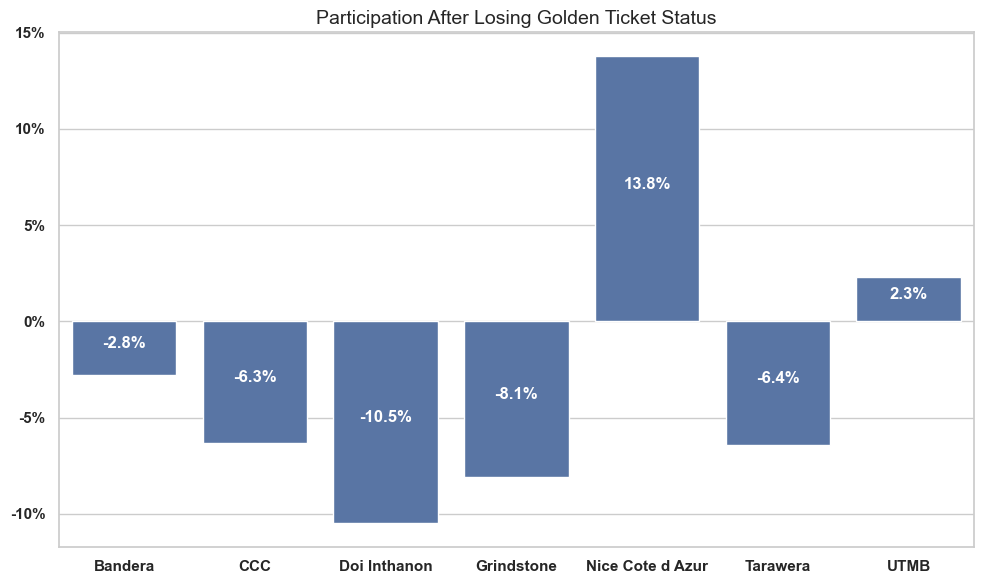

In [66]:

# Set style
sns.set(style="whitegrid")

# Create bar plot
plt.figure(figsize=(10,6))
barplot = sns.barplot(x='race_name', y='percent_change_starters', data=percent_change_df)
plt.title('Participation After Losing Golden Ticket Status', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0, fontweight = 'bold')

# yticks converted to %
plt.gca().set_yticklabels([f"{int(t)}%" for t in plt.gca().get_yticks()])
plt.yticks(fontweight = 'bold')

# Add percentage labels on top of bars
for index, row in percent_change_df.iterrows():
    # Determine text color based on bar value
    text_color = 'white' if row['percent_change_starters'] > 0 else 'white'
    barplot.text(index, row['percent_change_starters']/2,  # Position text halfway inside the bar
                 f"{row['percent_change_starters']}%", color=text_color, ha="center", fontsize=12, fontweight = 'bold')


plt.tight_layout()

plt.savefig('../data/participation_after_losing_gt_status_plot.png', dpi = 300)

plt.show()

In [123]:
df = pd.read_csv('../../data/sql_backup_queries_csv/csv/gt_ws_perf_with_norm.csv')

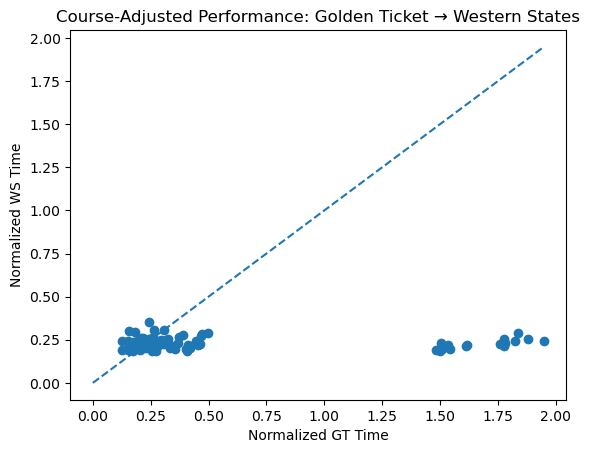

In [124]:
plt.figure()
plt.scatter(df['gt_norm'], df['ws_norm'])
plt.xlabel("Normalized GT Time")
plt.ylabel("Normalized WS Time")
plt.title("Course-Adjusted Performance: Golden Ticket → Western States")
plt.plot([0, df['gt_norm'].max()],
         [0, df['gt_norm'].max()],
         linestyle='--')  # 1:1 prediction line

Text(0.5, 1.0, 'Which Golden Ticket Races Produce WS Success?')

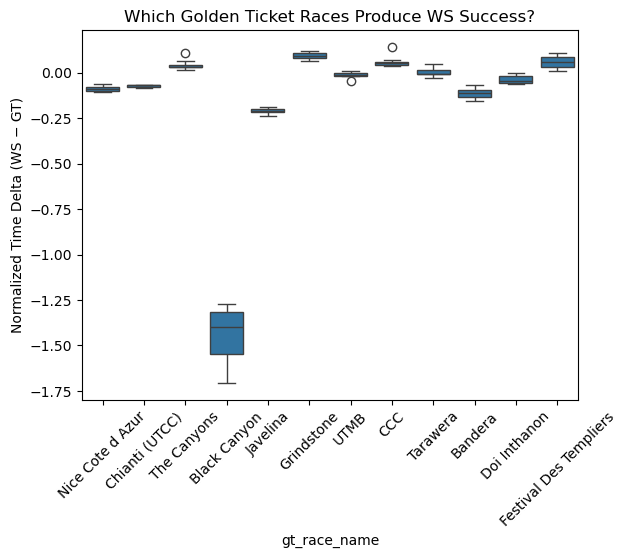

In [125]:
sns.boxplot(data=df, x='gt_race_name', y='delta_norm')
plt.xticks(rotation=45)
plt.ylabel("Normalized Time Delta (WS − GT)")
plt.title("Which Golden Ticket Races Produce WS Success?")

In [126]:
finish_rate = df['ws_status'].eq('Finisher').mean()*100
dnf_rate = df['ws_status'].eq('DNF').mean()*100
dns_rate = df['ws_status'].eq('DNS').mean()*100

In [127]:
finish_rate

np.float64(80.53097345132744)

In [128]:
dnf_rate

np.float64(11.504424778761061)

In [129]:
dns_rate

np.float64(7.964601769911504)

In [130]:
df['delta_norm'].median()

-0.044953321178321

In [131]:
df['delta_norm_pct'].median()

-16.3522499798583

In [132]:
df.groupby('gt_race_name')['delta_norm_pct'].median().sort_values()

gt_race_name
Black Canyon             -86.741716
Javelina                 -49.604179
Bandera                  -33.674620
Nice Cote d Azur         -28.461589
Chianti (UTCC)           -27.146669
Doi Inthanon             -16.352250
UTMB                      -5.145562
Tarawera                  -2.736798
The Canyons               17.821928
Festival Des Templiers    24.183324
CCC                       26.854045
Grindstone                62.285902
Name: delta_norm_pct, dtype: float64

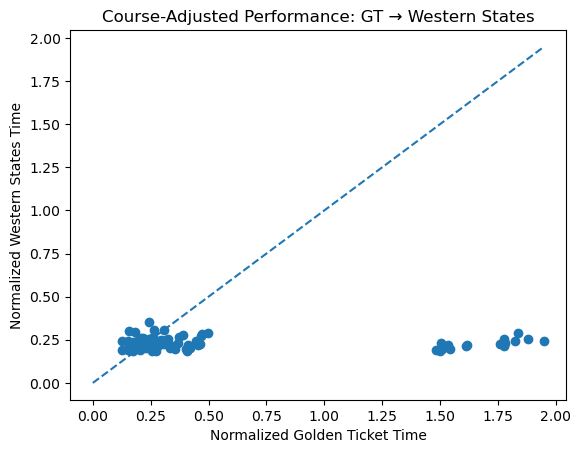

In [133]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df['gt_norm'], df['ws_norm'])
plt.xlabel("Normalized Golden Ticket Time")
plt.ylabel("Normalized Western States Time")
plt.title("Course-Adjusted Performance: GT → Western States")
# Add 1:1 reference line
lim = max(df['gt_norm'].max(), df['ws_norm'].max())
plt.plot([0, lim], [0, lim], linestyle='--')

In [137]:
outliers = df[df["gt_norm"] > 1.3][["gt_normalized_name","gt_race_name","gt_norm","ws_norm"]]
print(outliers)

       gt_normalized_name  gt_race_name   gt_norm   ws_norm
3            hayden hawks  Black Canyon  1.501000  0.185439
8            seth ruhling  Black Canyon  1.483056  0.192964
9        anthony costales  Black Canyon  1.509444  0.195038
12            chris myers  Black Canyon  1.543444  0.197001
24      janosch kowalczyk  Black Canyon  1.533333  0.207919
30            scott traer  Black Canyon  1.610389  0.213510
31              abby hall  Black Canyon  1.775278  0.213914
36           jeffrey colt  Black Canyon  1.617444  0.217049
41   jupiter carera casas  Black Canyon  1.533111  0.221811
47           rachel drake  Black Canyon  1.757944  0.224921
55         joe mcconaughy  Black Canyon  1.505389  0.232211
57          meghan morgan  Black Canyon  1.779556  0.234134
61          taylor nowlin  Black Canyon  1.947444  0.241677
66          lauren puretz  Black Canyon  1.823222  0.242904
73          becca windell  Black Canyon  1.775889  0.252828
74      anne-marie madden  Black Canyon 

Text(0.5, 1.0, 'Which Golden Ticket Races Predict WS Success?')

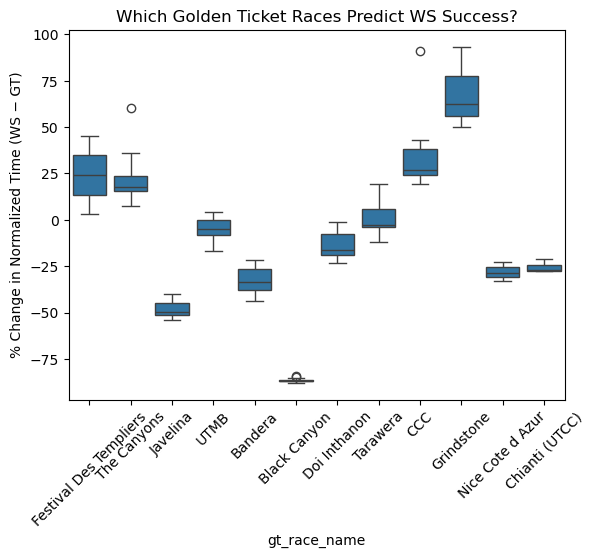

In [14]:
import seaborn as sns

sns.boxplot(data=df, x='gt_race_name', y='delta_norm_pct')
plt.xticks(rotation=45)
plt.ylabel("% Change in Normalized Time (WS − GT)")
plt.title("Which Golden Ticket Races Predict WS Success?")

In [15]:
gender_split = (
    df.groupby(['gt_race_name', 'gt_gender'])['delta_norm_pct']
      .median()
      .round(2)
      .unstack()          # makes columns M / F
      .sort_values(by='M', ascending=True)
)

gender_split

gt_gender,F,M
gt_race_name,,
Black Canyon,-86.76,-86.74
Javelina,-43.98,-51.16
Bandera,-36.41,-29.14
Nice Cote d Azur,-28.46,-27.95
Chianti (UTCC),-24.21,-27.69
Doi Inthanon,-9.92,-16.35
Tarawera,-0.06,-3.95
UTMB,-7.41,-2.88
Festival Des Templiers,45.25,3.12


In [17]:
finish_rates = (
    df.groupby(['gt_race_name', 'gt_gender'])['ws_status']
      .apply(lambda x: (x=='Finisher').mean()*100)
      .round(1)
      .unstack()
)

finish_rates

gt_gender,F,M
gt_race_name,,
Bandera,75.0,100.0
Black Canyon,72.7,81.8
CCC,60.0,80.0
Chianti (UTCC),100.0,50.0
Doi Inthanon,50.0,75.0
Festival Des Templiers,100.0,50.0
Grindstone,50.0,100.0
Javelina,75.0,75.0
Nice Cote d Azur,50.0,100.0


In [18]:
performance = (
    df.groupby(['gt_race_name', 'gt_gender'])
      .agg(
          median_delta_pct=('delta_norm_pct', 'median'),
          finish_rate=('ws_status', lambda x: (x=='Finisher').mean()*100)
      )
      .round(2)
      .reset_index()
)

performance

,gt_race_name,gt_gender,median_delta_pct,finish_rate
0,Bandera,F,-36.41,75.00
1,Bandera,M,-29.14,100.00
2,Black Canyon,F,-86.76,72.73
3,Black Canyon,M,-86.74,81.82
4,CCC,F,22.69,60.00
5,CCC,M,38.22,80.00
6,Chianti (UTCC),F,-24.21,100.00
7,Chianti (UTCC),M,-27.69,50.00
8,Doi Inthanon,F,-9.92,50.00
9,Doi Inthanon,M,-16.35,75.00


<Figure size 640x480 with 0 Axes>

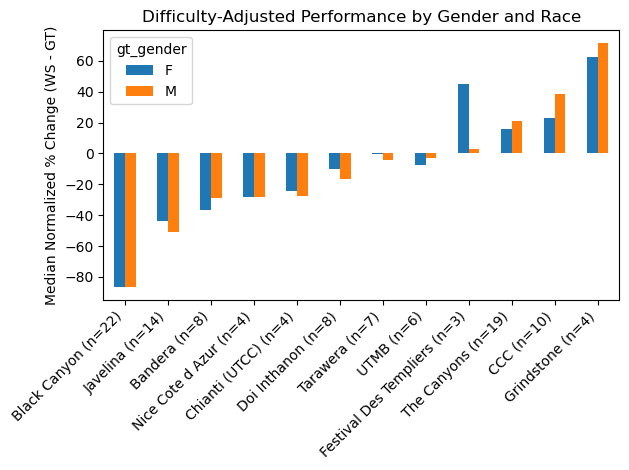

In [19]:
# --- compute sample size per race ---
race_counts = df.groupby('gt_race_name')['gt_normalized_name'].nunique()

# --- rebuild index labels as "Race (n=#)" ---
gender_split.index = [
    f"{race} (n={race_counts[race]})" for race in gender_split.index
]

# --- plot ---
plt.figure()
gender_split.plot(kind='bar')
plt.ylabel("Median Normalized % Change (WS - GT)")
plt.title("Difficulty-Adjusted Performance by Gender and Race")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [20]:
race_bins = {
    'Black Canyon': 'Runnable Desert',
    'Javelina': 'Runnable Desert',
    'Bandera': 'Runnable Desert',
    'The Canyons': 'Mountain California',
    'Tarawera': 'Tropical/Humid',
    'Doi Inthanon': 'Tropical/Humid',
    'UTMB': 'Alpine Mountain',
    'CCC': 'Alpine Mountain',
    'Nice Cote d Azur': 'Alpine Mountain',
    'Festival Des Templiers': 'Alpine Mountain',
    'Chianti (UTCC)': 'Alpine Mountain',
    'Grindstone': 'Technical East Coast'
}

df['race_type'] = df['gt_race_name'].map(race_bins)

In [21]:
race_type_split = (
    df.groupby(['race_type', 'gt_gender'])['delta_norm_pct']
      .median()
      .unstack()
      .sort_values(by='M')
)

race_type_split

gt_gender,F,M
race_type,,
Runnable Desert,-51.198750,-54.264001
Tropical/Humid,-1.687877,-7.453783
Alpine Mountain,-1.574675,0.931492
Mountain California,15.950289,20.796129
Technical East Coast,62.285902,71.758889


In [22]:
finish_rate_bin = (
    df.groupby(['race_type', 'gt_gender'])['ws_status']
      .apply(lambda x: (x=='Finisher').mean()*100)
      .unstack()
)

finish_rate_bin

gt_gender,F,M
race_type,,
Alpine Mountain,76.923077,78.571429
Mountain California,90.000000,90.000000
Runnable Desert,73.913043,82.608696
Technical East Coast,50.000000,100.000000
Tropical/Humid,75.000000,87.500000


<Figure size 640x480 with 0 Axes>

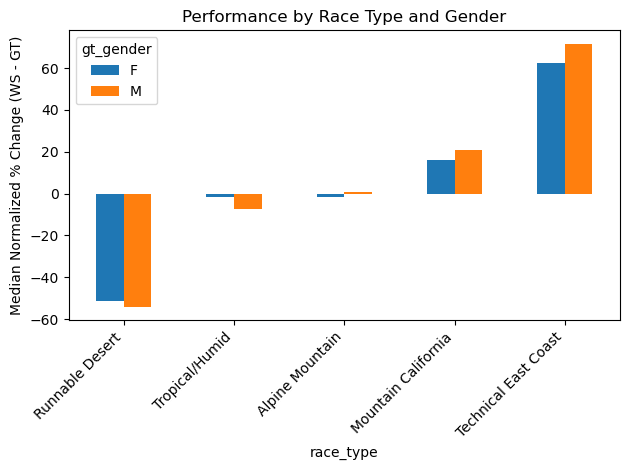

In [23]:
plt.figure()
race_type_split.plot(kind='bar')
plt.ylabel("Median Normalized % Change (WS - GT)")
plt.title("Performance by Race Type and Gender")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df[(df['ws_status']!='Finisher') & df['ws_time'].notna()][['gt_normalized_name','ws_status','ws_time']]

In [ ]:
df[(df['ws_status']=='Finisher') & ((df['ws_time'].isna()) | (df['ws_hour']==0))]

In [ ]:
df[(df['ws_status']!='Finisher') & df['delta_norm_pct'].notna()][['gt_race_name','gt_normalized_name','delta_norm_pct']]

In [ ]:
df[df['diff_index'].isna()][['gt_race_name','gt_normalized_name']]

In [ ]:
df['gt_normalized_name'].value_counts().head()

In [ ]:
df[(df['delta_norm_pct'] > 200) | (df['delta_norm_pct'] < -200)][['gt_race_name','gt_normalized_name','gt_time','ws_time','delta_norm_pct']]

In [ ]:
df[(df['gt_hour'].isna()) | (df['ws_hour'].isna())][['gt_race_name','gt_normalized_name']]

In [ ]:
df[df['ws_status']=='DNS'].groupby('gt_race_name')['gt_normalized_name'].count()

In [ ]:
df.groupby('gt_race_name')['gt_normalized_name'].nunique().sort_values()

In [49]:
df['placement_change'] = df.apply(
    lambda x: x['ws_rank'] - x['gt_gender_rank']
    if pd.notnull(x['ws_rank']) and pd.notnull(x['gt_gender_rank'])
    else None,
    axis=1
)

df[['gt_normalized_name','gt_race_name','ticket_position','ws_rank','placement_change','ws_status']]

,gt_normalized_name,gt_race_name,ticket_position,ws_rank,placement_change,ws_status
0,jim walmsley,Nice Cote d Azur,1,1.0,0.0,Finisher
1,kilian jornet burgada,Chianti (UTCC),1,3.0,1.0,Finisher
2,rod farvard,The Canyons,1,2.0,1.0,Finisher
3,hayden hawks,Black Canyon,1,3.0,2.0,Finisher
4,jeff mogavero,Javelina,2,4.0,2.0,Finisher
...,...,...,...,...,...,...
108,devon yanko,Javelina,1,NaN,NaN,DNS
109,devon yanko,Grindstone,2,NaN,NaN,DNS
110,will murray,Black Canyon,2,NaN,NaN,DNS
111,lin chen,Black Canyon,2,NaN,NaN,DNS


In [50]:
df[df['ws_status']=='Finisher'].groupby('gt_race_name')['placement_change'].median().sort_values()

gt_race_name
UTMB                      10.0
Chianti (UTCC)            16.0
Javelina                  17.5
Black Canyon              18.0
The Canyons               18.5
Bandera                   19.0
CCC                       19.0
Nice Cote d Azur          20.0
Tarawera                  24.5
Doi Inthanon              30.0
Grindstone                34.0
Festival Des Templiers    88.5
Name: placement_change, dtype: float64

In [56]:
df[(df['ws_status']=='Finisher') & (df['placement_change'] < 10)] \
  .sort_values('placement_change').head(10) \
  [['gt_normalized_name','gt_race_name', 'gt_race_id', 'ws_year', 'gt_gender_rank','ws_rank','placement_change']]

,gt_normalized_name,gt_race_name,gt_race_id,ws_year,gt_gender_rank,ws_rank,placement_change
6,tom evans,UTMB,14222,2023,3,1.0,-2.0
0,jim walmsley,Nice Cote d Azur,23444,2024,1,1.0,0.0
11,adam peterman,The Canyons,37542,2022,1,1.0,0.0
2,rod farvard,The Canyons,37544,2024,1,2.0,1.0
1,kilian jornet burgada,Chianti (UTCC),126002,2025,2,3.0,1.0
3,hayden hawks,Black Canyon,104108,2024,1,3.0,2.0
9,anthony costales,Black Canyon,93392,2023,1,3.0,2.0
4,jeff mogavero,Javelina,112165,2025,2,4.0,2.0
22,arlen glick,Javelina,81876,2022,1,3.0,2.0
26,ludovic pommeret,UTMB,14221,2022,4,6.0,2.0


In [57]:
df[(df['ws_status']=='Finisher') & (df['placement_change'] > 0)] \
  .sort_values('placement_change', ascending=False).head(10) \
  [['gt_normalized_name','gt_race_name','ticket_position','ws_rank','placement_change']]

,gt_normalized_name,gt_race_name,ticket_position,ws_rank,placement_change
90,anne-lise le quere,Festival Des Templiers,2,173.0,171.0
89,nancy jiang,Tarawera,1,110.0,109.0
88,wenfei xie,Doi Inthanon,2,101.0,99.0
87,adam peterman,CCC,2,68.0,65.0
83,ragna debats,Javelina,2,63.0,61.0
86,rod farvard,The Canyons,3,58.0,54.0
80,giulia vinco,Nice Cote d Azur,2,51.0,48.0
85,dominika stelmach,Black Canyon,1,48.0,46.0
84,brittany peterson,Javelina,2,47.0,45.0
73,becca windell,Black Canyon,2,44.0,42.0


In [58]:
place_df = df[df['ws_status']=='Finisher'].copy()

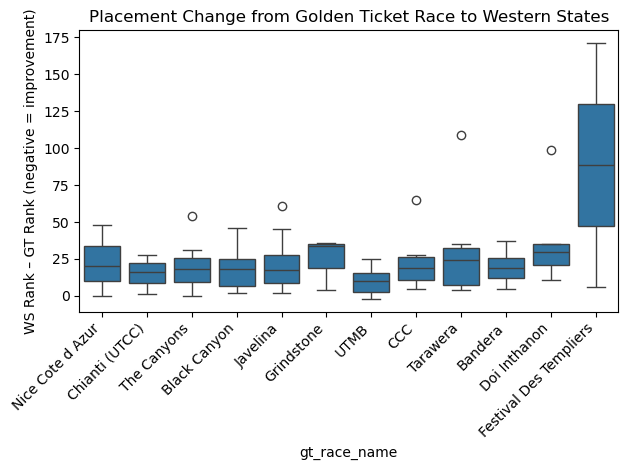

In [59]:
sns.boxplot(data=place_df, x='gt_race_name', y='placement_change')
plt.xticks(rotation=45, ha='right')
plt.ylabel("WS Rank – GT Rank (negative = improvement)")
plt.title("Placement Change from Golden Ticket Race to Western States")
plt.tight_layout()
plt.show()

In [139]:
df_results = pd.read_csv('../../data/master/excel_workbooks/race_results_master_for_power_bi.csv')

In [93]:
ws_df = df_results[df_results['race_name'].str.lower() == 'western states']

In [94]:
top3 = ws_df[ws_df['gender_rank'] <= 10]

In [95]:
avg_finish_times = (
    top3.groupby(['year', 'gender'])['time']
    .mean()
    .reset_index()
)


In [96]:
avg_finish_times

,year,gender,time
0,2022,F,0.770457
1,2022,M,0.672617
2,2023,F,0.722190
3,2023,M,0.644265
4,2024,F,0.705216
5,2024,M,0.616616
6,2025,F,0.723388
7,2025,M,0.631205


In [98]:
avg_finish_times.to_csv('../../data/master/future_use/ws_avg_finish_times_top_10.csv', index = False)

In [80]:

avg_finish_times['time'] = pd.to_timedelta(avg_finish_times['time'], unit='D')

# Optional: format as HH:MM:SS
avg_finish_times['time'] = avg_finish_times['time'].apply(lambda x: str(x))


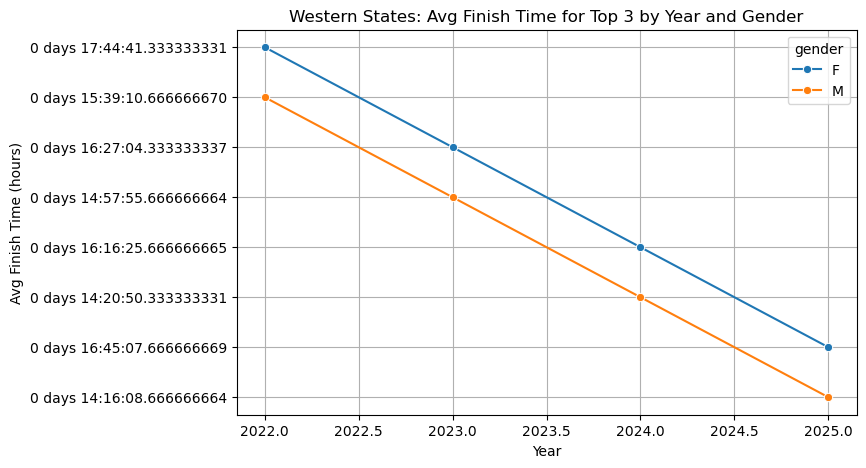

In [84]:

plt.figure(figsize=(8, 5))
sns.lineplot(data=avg_finish_times, x='year', y='time', hue='gender', marker='o')
plt.title('Western States: Avg Finish Time for Top 3 by Year and Gender')
plt.xlabel('Year')
plt.ylabel('Avg Finish Time (hours)')
plt.grid(True)


In [239]:
df = pd.read_csv('../../data/master/golden_ticket_recipient_master_table.csv')

    WS_Year WS_Status  Count
0      2022       DNF      1
1      2022       DNS      4
2      2022  Finisher     21
3      2023       DNF      3
4      2023       DNS      1
5      2023  Finisher     24
6      2024       DNF      3
7      2024       DNS      1
8      2024  Finisher     26
9      2025       DNF      6
10     2025       DNS      3
11     2025  Finisher     21


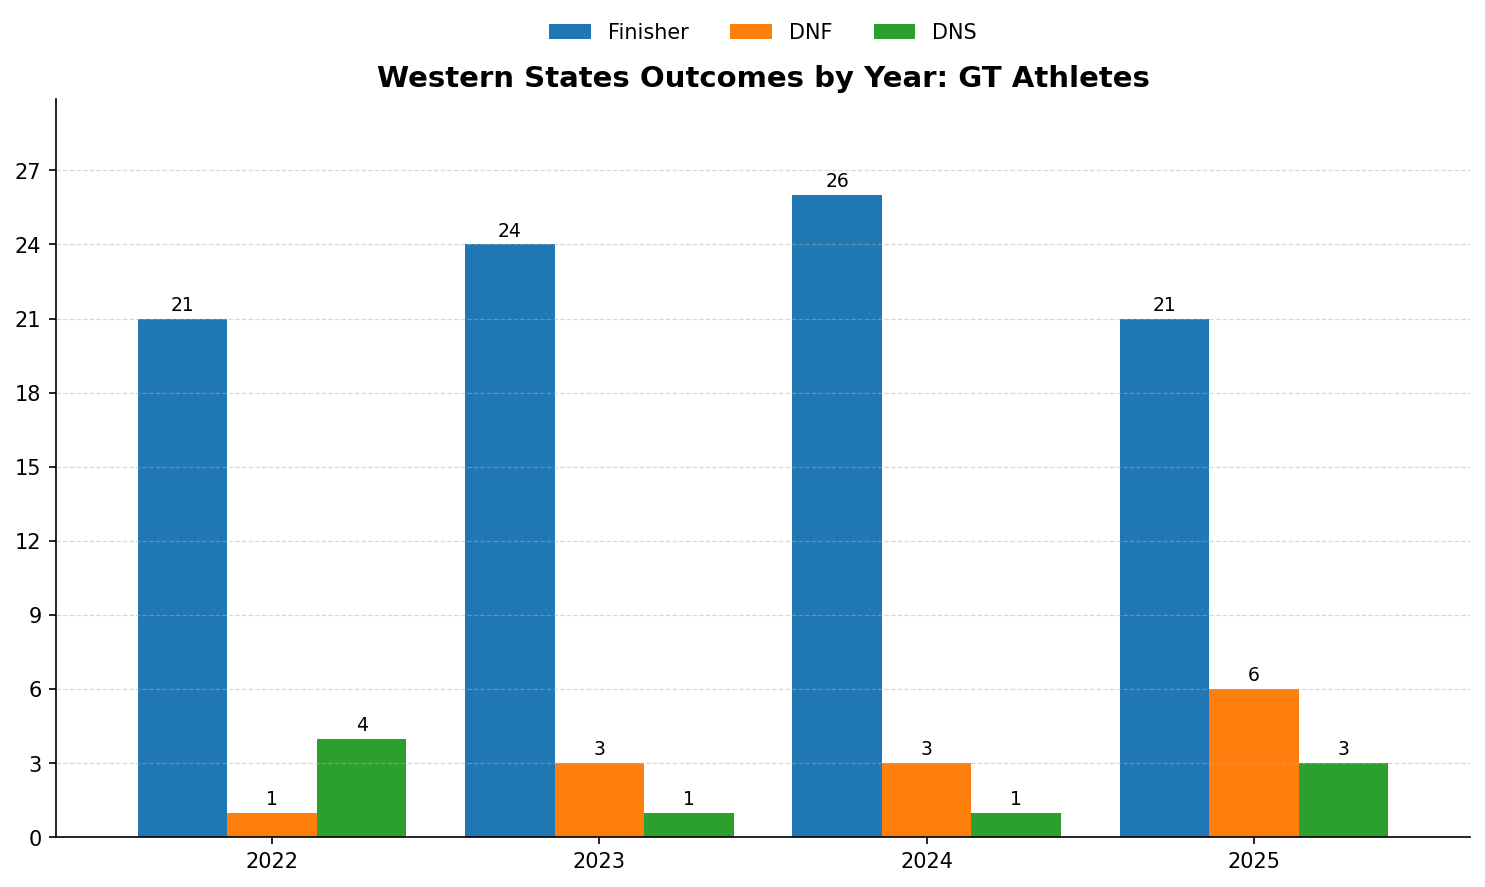

In [240]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def get_status(row):
    if row["Finisher_Flag"] == True:
        return "Finisher"
    elif row["DNF_Flag"] == True:
        return "DNF"
    elif row["DNS_Flag"] == True:
        return "DNS"
    else:
        return "Unknown"

df["WS_Status"] = df.apply(get_status, axis=1)

# Filter to 2022–2025 only
df = df[df["WS_Year"].between(2022, 2025)]

# ---- GROUP RESULTS ----
status_year = (
    df.groupby(["WS_Year", "WS_Status"])
      .size()
      .reset_index(name="Count")
      .sort_values(["WS_Year", "WS_Status"])
)

print(status_year)

# ---- PLOT: One bar per status per year ----
pivot = status_year.pivot(index="WS_Year", columns="WS_Status", values="Count").fillna(0)

# pivot = status_year.pivot(index="WS_Year", columns="WS_Status", values="Count").fillna(0)
desired_order = ["Finisher", "DNF", "DNS"]
pivot = pivot.reindex(columns=desired_order, fill_value=0).sort_index()

fig, ax = plt.subplots(figsize=(10, 6), dpi=150)

# Draw grouped bars
pivot.plot(kind="bar", ax=ax, width=0.82)  # slimmer bars look cleaner

# Title & axes
ax.set_title("Western States Outcomes by Year: GT Athletes", fontsize=14, weight="bold")
ax.set_xlabel("")
ax.set_ylabel("", fontsize=11, weight="bold")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Grid & spines for a polished look
ax.grid(axis="y", linestyle="--", linewidth=0.6, alpha=0.5)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Ticks
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_tick_params(labelsize=10)

# Legend on one line, unobtrusive
ax.legend(ncol=3, frameon=False, loc="lower center",
          bbox_to_anchor=(0.5, 1.05), fontsize=10, title_fontsize=10)

# Add value labels on top of each bar
# (DataFrame.plot returns a list of BarContainer objects)
for container in ax.containers:
    # Only label non-zero bars
    labels = [f"{int(v)}" if v > 0 else "" for v in container.datavalues]
    ax.bar_label(container, labels=labels, padding=2, fontsize=9)

# Add headroom so labels don’t clip
ax.set_ylim(0, max(pivot.max()) * 1.15)

plt.tight_layout()

plt.savefig('../python_images/ws_outcomes_by_year.png', dpi = 300)

plt.show()


✅ Top-10 Percent by Year:
   ws_year  Top10_Percent
0     2022      47.619048
1     2023      51.851852
2     2024      34.482759
3     2025      51.851852


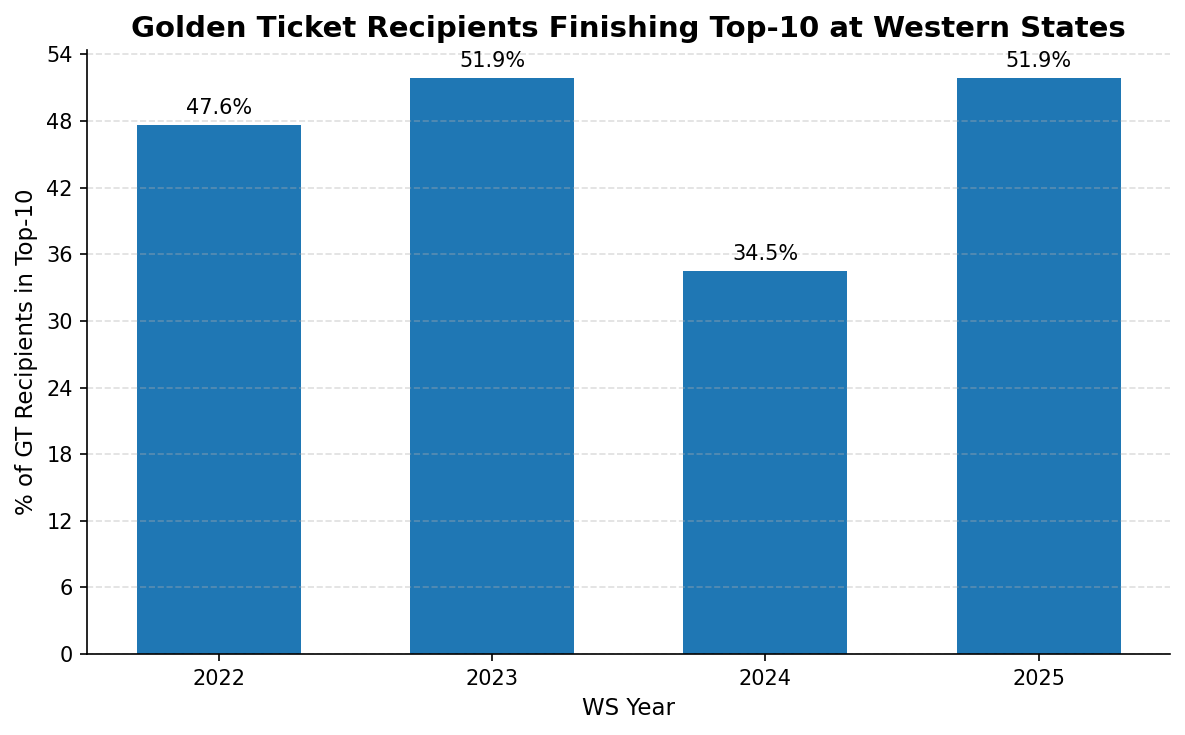

In [151]:
df["ws_year"] = pd.to_numeric(df["ws_year"], errors="coerce")

df = df[df["ws_year"].isin([2022, 2023, 2024, 2025])]

# We only want athletes who started WS (exclude DNS if present)
if "ws_status" in df.columns:
    ws_starters = df[df["ws_status"] != "DNS"].copy()
else:
    ws_starters = df.copy()

# Identify Top-10 finishers
# Change column name if needed: ws_finish_place, ws_gender_rank, etc
rank_col = "ws_finish_place" if "ws_finish_place" in df.columns else "ws_gender_rank"
ws_starters[rank_col] = pd.to_numeric(ws_starters[rank_col], errors="coerce")

ws_starters["Top10_Flag"] = ws_starters[rank_col] <= 10

# Compute % Top-10 by year
top10_summary = (
    ws_starters.groupby("ws_year")["Top10_Flag"]
    .mean()
    .reset_index(name="Top10_Percent")
)

top10_summary["Top10_Percent"] = top10_summary["Top10_Percent"] * 100

print("\n✅ Top-10 Percent by Year:")
print(top10_summary)

# ---- PLOT ----
top10_summary = top10_summary.sort_values("ws_year").copy()
top10_summary["ws_year"] = top10_summary["ws_year"].astype(int)

x = top10_summary["ws_year"].to_numpy()
y = top10_summary["Top10_Percent"].to_numpy()

fig, ax = plt.subplots(figsize=(8,5), dpi=150)
ax.bar(x, y, width=0.6)

ax.set_title("Golden Ticket Recipients Finishing Top-10 at Western States", fontsize=14, weight="bold")
ax.set_xlabel("WS Year", fontsize=11)   # or leave "" if you prefer
ax.set_ylabel("% of GT Recipients in Top-10", fontsize=11)

# Value labels
for i, v in enumerate(y):
    ax.text(x[i], v + 1, f"{v:.1f}%", ha="center", fontsize=10)

# Clean axes & ticks
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.grid(axis="y", linestyle="--", alpha=0.4)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xticks(x)
ax.set_xticklabels(x, rotation=0)

plt.tight_layout()
plt.show()

In [155]:
df = pd.read_csv('../../data/sql_backup_queries_csv/csv/gt_ws_perf_with_norm.csv')

In [152]:
ws_starters.groupby("ws_year")["Top10_Flag"].agg(["sum","count"])

,sum,count
ws_year,,
2022,10,21
2023,14,27
2024,10,29
2025,14,27


In [154]:
df[df["ws_year"] == 2025][["gt_normalized_name","ws_gender_rank","ws_status"]]

,gt_normalized_name,ws_gender_rank,ws_status
1,kilian jornet burgada,3.0,Finisher
4,jeff mogavero,4.0,Finisher
8,seth ruhling,6.0,Finisher
20,ryan montgomery,7.0,Finisher
23,hans troyer,8.0,Finisher
25,peter frano,9.0,Finisher
28,hiroki kai,10.0,Finisher
31,abby hall,1.0,Finisher
35,marianne hogan,3.0,Finisher
37,hannes namberger,11.0,Finisher


In [177]:
# --- CLEAN & FILTER BASE DATA ---
df["ws_year"] = pd.to_numeric(df["ws_year"], errors="coerce")
df = df[df["ws_year"].isin([2022, 2023, 2024, 2025])]

# Only Western States starters
if "ws_status" in df.columns:
    ws_starters = df[df["ws_status"] != "DNS"].copy()
else:
    ws_starters = df.copy()

# Choose correct rank column
rank_col = "ws_finish_place" if "ws_finish_place" in df.columns else "ws_gender_rank"
ws_starters[rank_col] = pd.to_numeric(ws_starters[rank_col], errors="coerce")

# Top 10 flag
ws_starters["Top10_Flag"] = ws_starters[rank_col] <= 10

# --------------------
# ✅ Percentage Top-10 by YEAR *and* GENDER
# --------------------
top10_gender = (
    ws_starters.groupby(["ws_year", "gt_gender"])["Top10_Flag"]
               .mean()
               .reset_index(name="Top10_Percent")
)

top10_gender["Top10_Percent"] = top10_gender["Top10_Percent"] * 100
top10_gender = top10_gender.sort_values(["ws_year", "gt_gender"])

print("\n✅ Top-10 Percent by Year and Gender:")
top10_gender


✅ Top-10 Percent by Year and Gender:


,ws_year,gt_gender,Top10_Percent
0,2022,F,45.454545
1,2022,M,50.000000
2,2023,F,46.153846
3,2023,M,57.142857
4,2024,F,21.428571
5,2024,M,46.666667
6,2025,F,50.000000
7,2025,M,53.846154


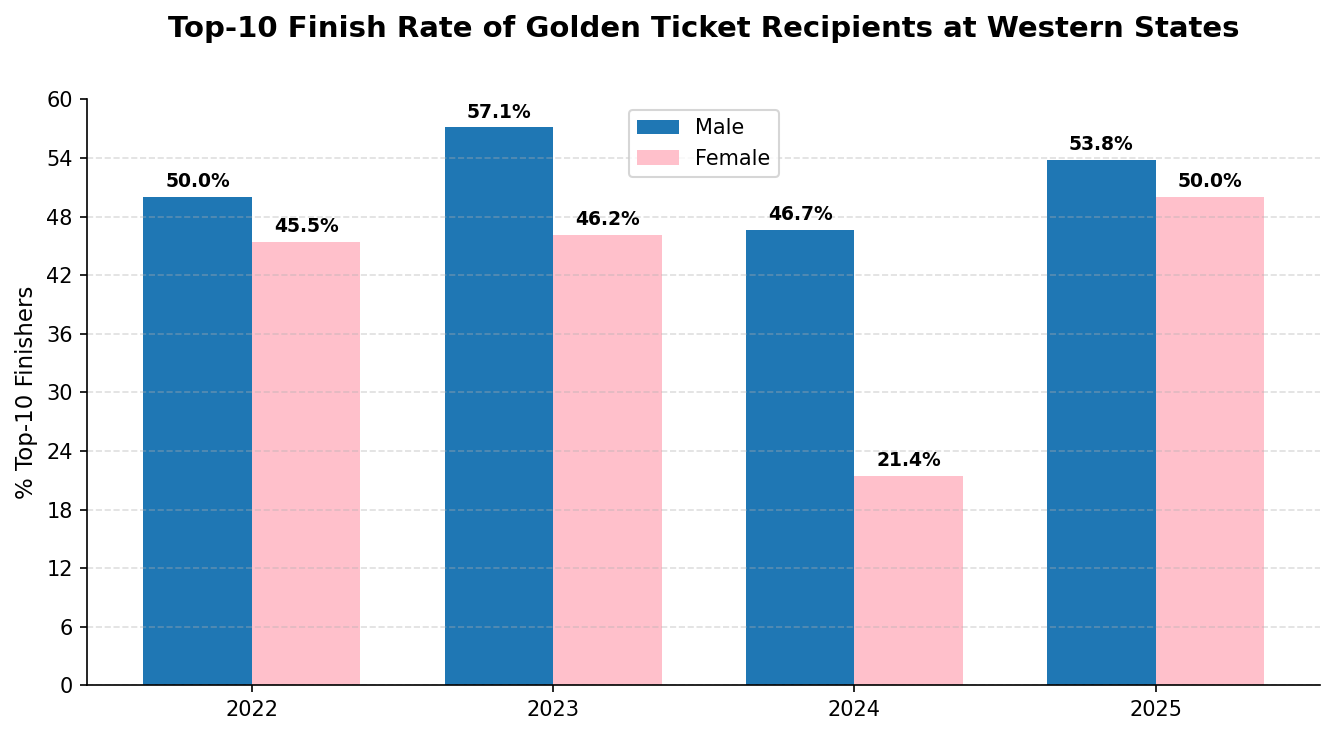

In [176]:
# Pivot so we get columns: 'M' and 'F'
pivot_gender = top10_gender.pivot(index="ws_year", columns="gt_gender", values="Top10_Percent").fillna(0)

# Ensure sortable integer index
pivot_gender.index = pivot_gender.index.astype(int)
pivot_gender = pivot_gender.sort_index()

# Build grouped bar positions
years = pivot_gender.index.to_numpy()
bar_width = 0.36
x = np.arange(len(years))

fig, ax = plt.subplots(figsize=(9,5), dpi=150)

# Bars for Men and Women
if "M" in pivot_gender.columns:
    ax.bar(x - bar_width/2, pivot_gender["M"], width=bar_width, label="Male")
if "F" in pivot_gender.columns:
    ax.bar(x + bar_width/2, pivot_gender["F"], width=bar_width, label="Female", color = 'pink')

# Titles / labels
ax.set_title("Top-10 Finish Rate of Golden Ticket Recipients at Western States", fontsize=14, weight="bold", pad=30)
ax.set_xlabel("", fontsize=11)
ax.set_ylabel("% Top-10 Finishers", fontsize=11)

# X-ticks
ax.set_xticks(x)
ax.set_xticklabels(years, rotation=0)

# Value labels
for gender in pivot_gender.columns:
    for i, year in enumerate(years):
        v = pivot_gender.loc[year, gender]
        if v > 0:
            ax.text(i + (-bar_width/2 if gender=="M" else bar_width/2),
                    v + 1, f"{v:.1f}%", ha="center", fontsize=9, fontweight='bold')

# Styling
ax.grid(axis="y", linestyle="--", alpha=0.4)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.legend(frameon=True, loc="best")

plt.tight_layout()

plt.savefig('../python_images/top_10_gt_ws.png', dpi = 300)

plt.show()

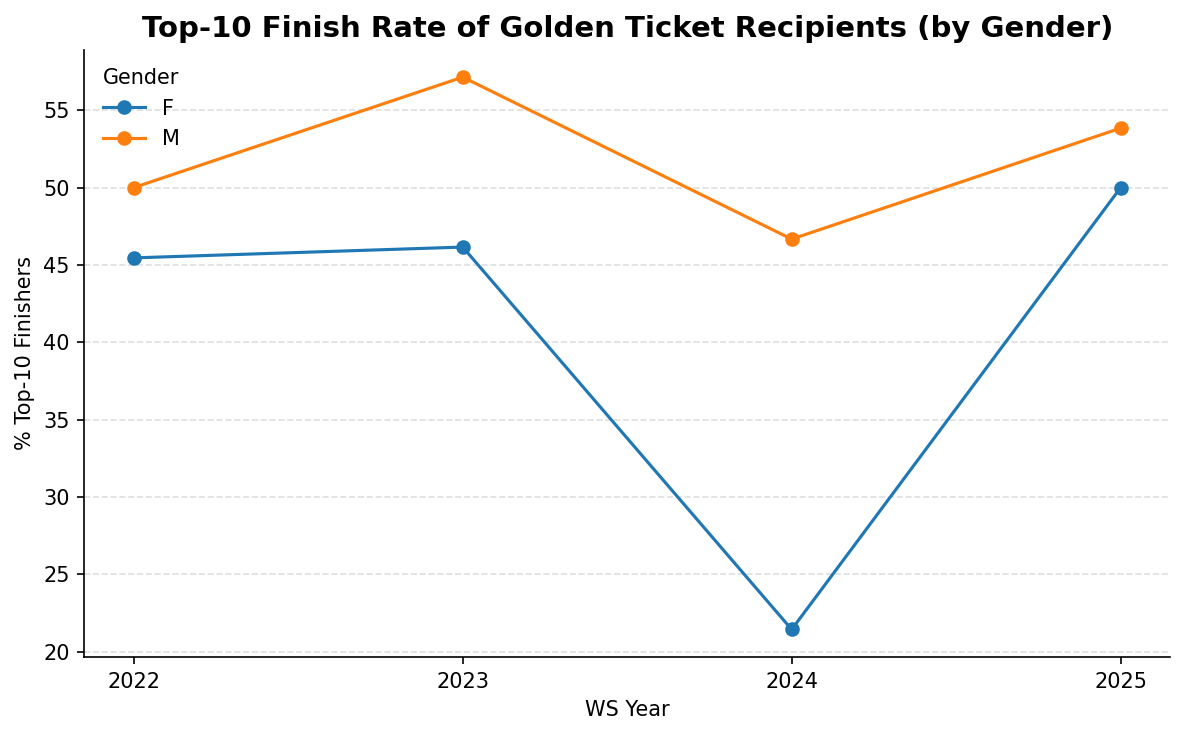

In [159]:
# pivot_gender created already above
pivot_gender = pivot_gender.sort_index()

fig, ax = plt.subplots(figsize=(8,5), dpi=150)

for gender in pivot_gender.columns:
    ax.plot(pivot_gender.index, pivot_gender[gender], marker="o", label=gender)

ax.set_title("Top-10 Finish Rate of Golden Ticket Recipients (by Gender)", fontsize=14, weight="bold")
ax.set_xlabel("WS Year")
ax.set_ylabel("% Top-10 Finishers")

ax.set_xticks(pivot_gender.index)
ax.set_xticklabels(pivot_gender.index.astype(int), rotation=0)

ax.grid(axis="y", linestyle="--", alpha=0.4)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(title="Gender", frameon=False)

plt.tight_layout()
plt.show()

In [212]:
df = pd.read_csv('../../data/sql_backup_queries_csv/csv/gt_ws_perf_with_norm.csv')

# ----- Flag outcome types -----
df["is_finisher"] = df["ws_status"] == "Finisher"
df["is_dnf"]      = df["ws_status"] == "DNF"
df["is_dns"]      = df["ws_status"] == "DNS"

# ----- Compute percentile rank ONLY for finishers -----
finishers = df[df["is_finisher"]].copy()
finishers["ws_pct_rank"] = finishers["ws_gender_rank"] / 369     # ≈ field size
finishers["top_5pct"] = finishers["ws_pct_rank"] <= 0.054

# ----- NEW: flag Top-3 finishers (within gender) -----
finishers["top_3_finish"] = finishers["ws_gender_rank"] <= 3

# ----- Base summary -----
summary = (
    df.groupby("nationality")
      .agg(
          total_gt = ("nationality", "count"),
          finishers = ("is_finisher", "sum"),
          dnfs = ("is_dnf", "sum"),
          dns = ("is_dns", "sum")
      )
)

# Finish rate
summary["finish_rate"] = summary["finishers"] / summary["total_gt"]

# Top-5% rate (only finishers)
top5_rates = (
    finishers.groupby("nationality")["top_5pct"]
             .mean()
             .rename("pct_top_5pct_finishers")
)
summary = summary.join(top5_rates)

# NEW: Top-3 count + rate
top3_counts = (
    finishers.groupby("nationality")["top_3_finish"]
             .sum()
             .rename("top_3_finishers")
)
summary = summary.join(top3_counts)

top3_rates = (
    finishers.groupby("nationality")["top_3_finish"]
             .mean()
             .rename("pct_top_3_finishers")
)
summary = summary.join(top3_rates)

# Median gender rank
median_ranks = (
    finishers.groupby("nationality")["ws_gender_rank"]
             .median()
             .rename("median_ws_rank")
             .round(0)
)
summary = summary.join(median_ranks)

# Pretty string columns
summary["finish_rate_str"] = (summary["finish_rate"] * 100).round(1).astype(str) + "%"
summary["pct_top_5pct_str"] = (summary["pct_top_5pct_finishers"] * 100).round(1).astype(str) + "%"
summary["pct_top_3_str"] = (summary["pct_top_3_finishers"] * 100).round(1).astype(str) + "%"

# Sort largest → smallest by GT count
summary = summary.sort_values("total_gt", ascending=False)

summary.head(10)


,total_gt,finishers,dnfs,dns,finish_rate,pct_top_5pct_finishers,top_3_finishers,pct_top_3_finishers,median_ws_rank,finish_rate_str,pct_top_5pct_str,pct_top_3_str
nationality,,,,,,,,,,,,
USA,58,52,6,0,0.896552,0.903846,9,0.173077,10.0,89.7%,90.4%,17.3%
FRA,7,6,1,0,0.857143,0.833333,0,0.000000,8.0,85.7%,83.3%,0.0%
CHN,6,3,3,0,0.500000,0.666667,0,0.000000,19.0,50.0%,66.7%,0.0%
CAN,5,5,0,0,1.000000,1.000000,2,0.400000,8.0,100.0%,100.0%,40.0%
NOR,4,4,0,0,1.000000,1.000000,1,0.250000,6.0,100.0%,100.0%,25.0%
NZL,3,3,0,0,1.000000,0.666667,0,0.000000,14.0,100.0%,66.7%,0.0%
GBR,3,2,1,0,0.666667,1.000000,1,0.500000,3.0,66.7%,100.0%,50.0%
DEU,3,2,1,0,0.666667,1.000000,0,0.000000,10.0,66.7%,100.0%,0.0%
POL,2,1,1,0,0.500000,1.000000,0,0.000000,17.0,50.0%,100.0%,0.0%


In [216]:
df = pd.read_csv('../../data/master/excel_workbooks/gt_ws_perf_for_power_bi.csv')

In [221]:
df['ws_gender_rank'] = pd.to_numeric(df['ws_gender_rank'], errors='coerce')

finish_rate = (df['ws_status']=='Finisher').mean()
top10_gender = (df['ws_gender_rank'] <= 10).mean()
top20_gender = (df['ws_gender_rank'] <= 20).mean()
median_gender_rank = df.loc[df['ws_status']=='Finisher','ws_gender_rank'].median()

finish_rate, top10_gender, top20_gender, median_gender_rank

(np.float64(0.8053097345132744),
 np.float64(0.4247787610619469),
 np.float64(0.7256637168141593),
 10.0)

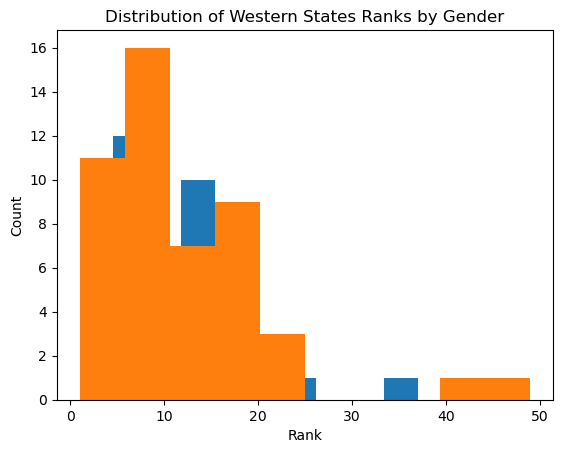

In [222]:
# Ensure numeric
df['ws_gender_rank'] = pd.to_numeric(df['ws_gender_rank'], errors='coerce')
df['ws_time'] = pd.to_numeric(df['ws_time'], errors='coerce')

# Gender breakdown stats
gender_stats = df.groupby('gt_gender').agg(
    finish_rate = ('ws_status', lambda x: (x=='Finisher').mean()),
    top10_rate = ('ws_gender_rank', lambda x: (x<=10).mean()),
    median_rank = ('ws_gender_rank', 'median')
)
gender_stats

# Visualization 1: distribution of WS ranks by gender
plt.figure()
for g in df['gt_gender'].unique():
    subset = df[df['gt_gender']==g]['ws_gender_rank'].dropna()
    plt.hist(subset)

plt.title("Distribution of Western States Ranks by Gender")
plt.xlabel("Rank")
plt.ylabel("Count")
plt.show()

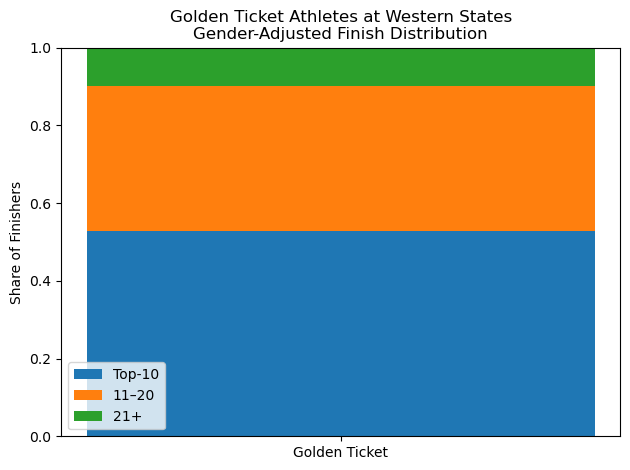

In [224]:
df['ws_gender_rank'] = pd.to_numeric(df['ws_gender_rank'], errors='coerce')
df['ws_status'] = df['ws_status'].fillna('DNF')

# Only finishers have meaningful ranks
finishers = df[df['ws_status']=='Finisher'].copy()

total = len(finishers)
top10 = (finishers['ws_gender_rank'] <= 10).sum()
top20 = (finishers['ws_gender_rank'] <= 20).sum() - top10
rest = total - top10 - top20

values = [top10/total, top20/total, rest/total]
labels = ['Top-10', '11–20', '21+']

plt.figure()
bottom = 0
for v, label in zip(values, labels):
    plt.bar(['Golden Ticket'], v, bottom=bottom, label=label)
    bottom += v

plt.title("Golden Ticket Athletes at Western States\nGender-Adjusted Finish Distribution")
plt.ylabel("Share of Finishers")
plt.ylim(0,1)
plt.legend()
plt.tight_layout()
plt.show()

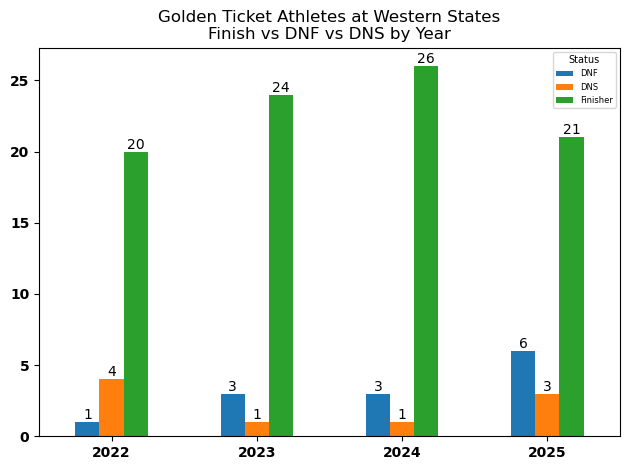

In [235]:
# ensure year numeric
df['ws_year'] = pd.to_numeric(df['ws_year'], errors='coerce')
df['ws_status'] = df['ws_status'].fillna('DNS')

# group counts
counts = df.groupby(['ws_year','ws_status']).size().unstack(fill_value=0)

# bar chart
ax = counts.plot(kind='bar')
plt.title("Golden Ticket Athletes at Western States\nFinish vs DNF vs DNS by Year")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=0, fontweight='bold')
plt.yticks(fontweight='bold')
legend = plt.legend(title="Status", prop={'size':6}) 
legend.get_title().set_fontsize(7)

for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()

plt.savefig('../python_images/gt_ws_status_plt.png', dpi = 300)

plt.show()

In [241]:
df = pd.read_csv('../../data/master/excel_workbooks/race_results_master_for_power_bi.csv')

In [237]:
df_all = pd.read_csv('../../data/master/excel_workbooks/race_results_master_for_power_bi.csv')

ws = df_all[df_all['race_name']=='Western States'].copy()
ws['year'] = pd.to_numeric(ws['year'], errors='coerce')
ws = ws[ws['year'].between(2022, 2025, inclusive='both')].copy()
ws['status'] = ws['status'].fillna('DNF')

total = len(ws)
finish = (ws['status']=='Finisher').sum()
dnf = (ws['status']=='DNF').sum()
dns = (ws['status']=='DNS').sum() if 'DNS' in ws['status'].unique() else 0

finish_rate = finish/total
dnf_rate = dnf/total
dns_rate = dns/total

finish_rate, dnf_rate, dns_rate

(np.float64(0.799468791500664), np.float64(0.20053120849933598), 0.0)

   year    status  Count
0  2022       DNF     78
1  2022  Finisher    305
2  2023       DNF     51
3  2023  Finisher    328
4  2024       DNF     89
5  2024  Finisher    286
6  2025       DNF     84
7  2025  Finisher    285


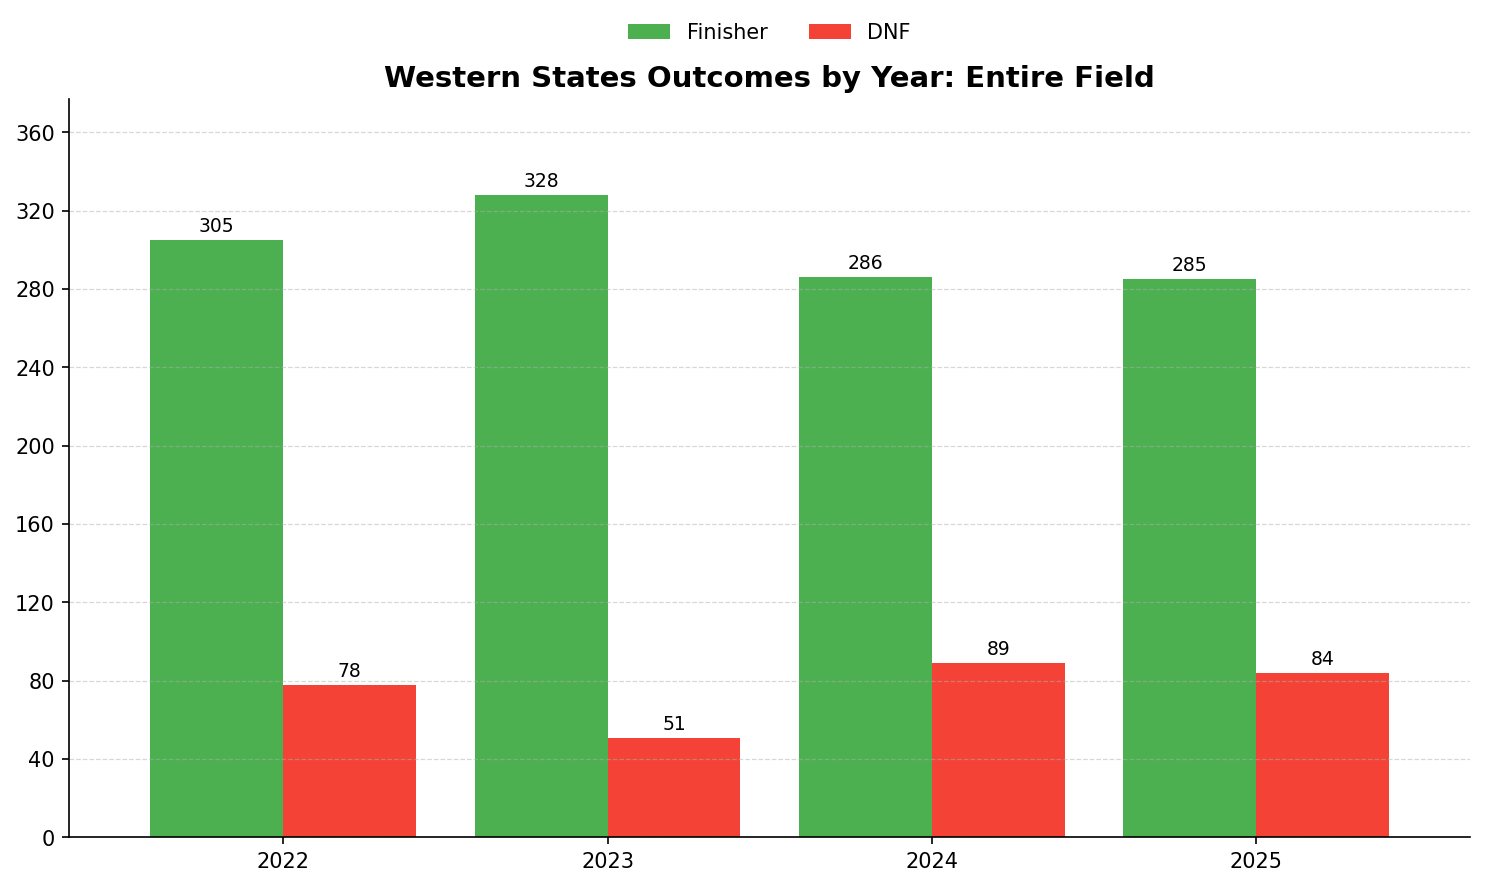

In [246]:
# Normalize types
ws['year'] = pd.to_numeric(ws['year'], errors='coerce')

# Filter to Western States 2022–2025 only
ws = ws[(ws['race_name'] == 'Western States') & (ws['year'].between(2022, 2025))]

# Only keep Finisher and DNF
# Treat missing/unknown statuses as DNF
ws['status'] = ws['status'].fillna('DNF')
ws = ws[ws['status'].isin(['Finisher', 'DNF'])]

# ---- COUNT BY YEAR ----
status_year = (
    ws.groupby(['year', 'status'])
      .size()
      .reset_index(name='Count')
      .sort_values(['year', 'status'])
)

print(status_year)

# Pivot for grouped bar plot
pivot = status_year.pivot(index='year', columns='status', values='Count').fillna(0)
pivot = pivot.reindex(columns=['Finisher','DNF'], fill_value=0).sort_index()

# ---- PLOT ----
fig, ax = plt.subplots(figsize=(10, 6), dpi=150)
pivot.plot(kind='bar', ax=ax, width=0.82, color=['#4CAF50', '#F44336'])

# Titles & labels
ax.set_title("Western States Outcomes by Year: Entire Field",
             fontsize=14, weight="bold")
ax.set_xlabel("")
ax.set_ylabel("", fontsize=11, weight="bold")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Visual polish
ax.grid(axis="y", linestyle="--", linewidth=0.6, alpha=0.5)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Legend
ax.legend(ncol=2, frameon=False, loc="lower center",
          bbox_to_anchor=(0.5, 1.05), fontsize=10, title_fontsize=10, title="")

# Value labels on bars
for container in ax.containers:
    labels = [f"{int(v)}" for v in container.datavalues]
    ax.bar_label(container, labels=labels, padding=2, fontsize=9)

# Headroom so labels don’t clip
ax.set_ylim(0, max(pivot.max()) * 1.15)

plt.tight_layout()
plt.savefig('../python_images/ws_full_field_outcomes_no_dns.png', dpi=300)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_8544\246028663.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(perf.index, rotation=45, ha='right')


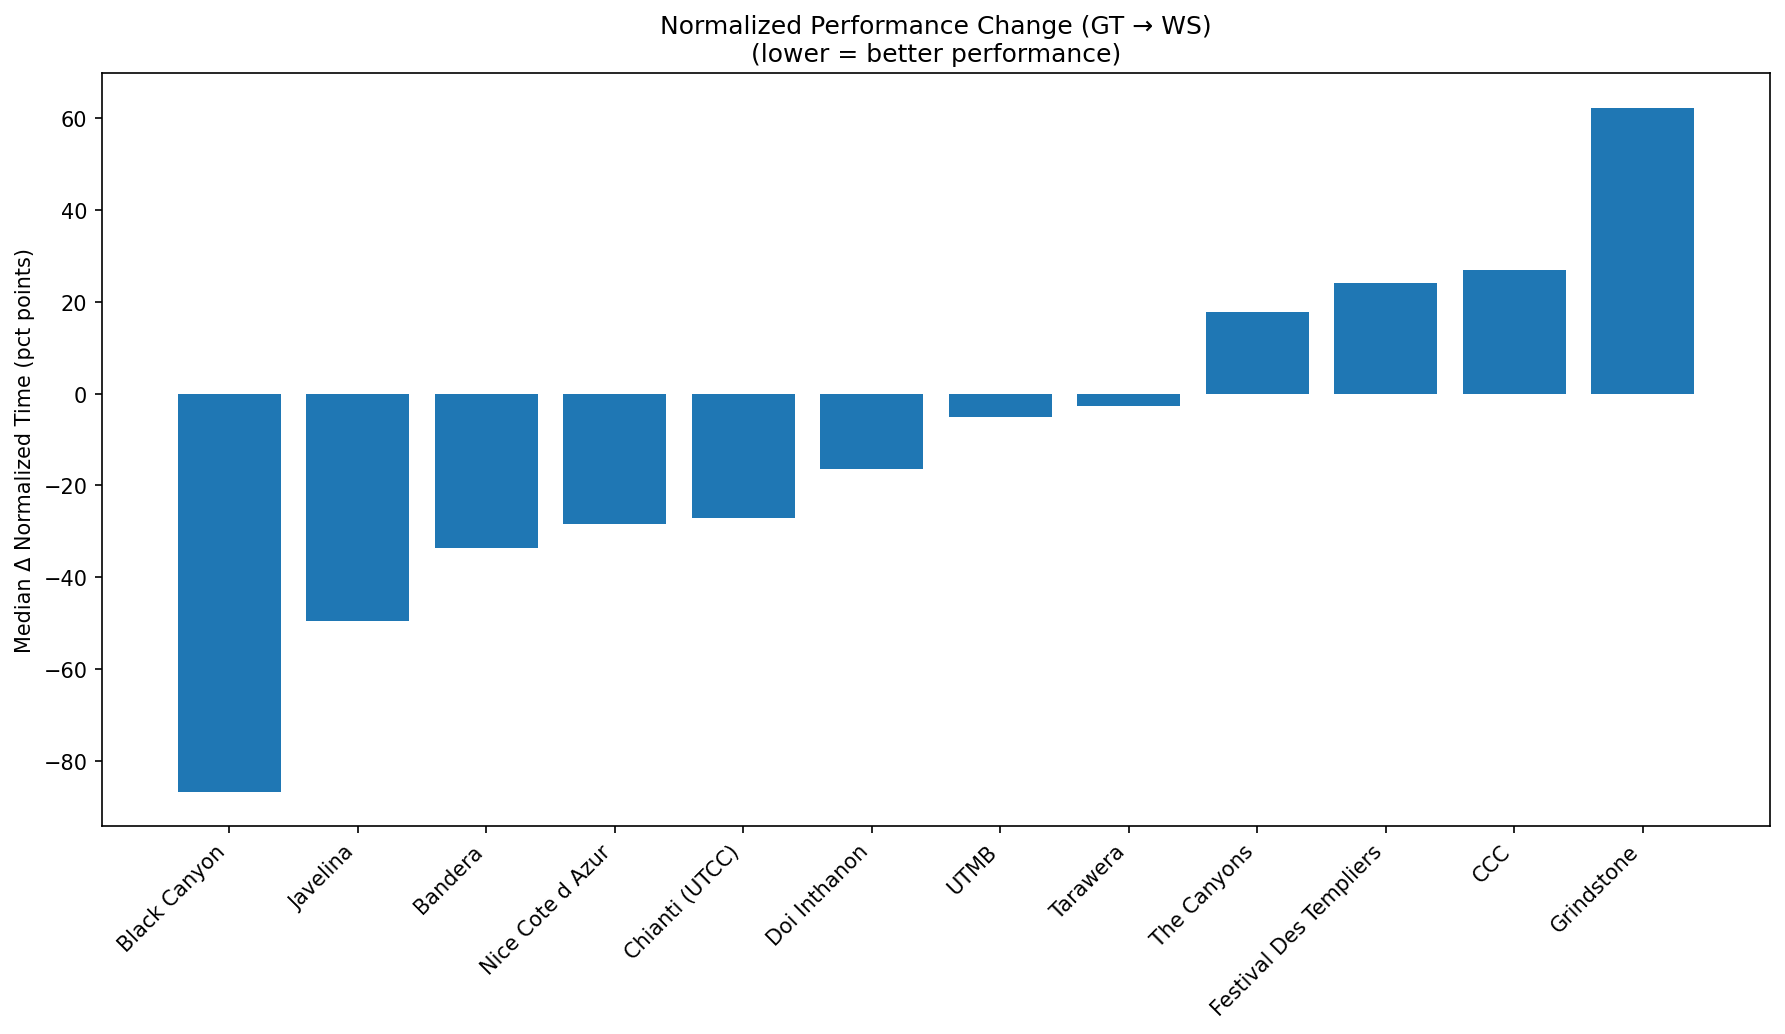

In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# ---------- LOAD ----------
gt_norm = pd.read_csv('../../data/sql_backup_queries_csv/csv/gt_ws_perf_with_norm.csv')

# Basic cleaning
gt_norm['ws_status'] = gt_norm['ws_status'].fillna('DNS')
gt_norm['delta_norm_pct'] = pd.to_numeric(gt_norm['delta_norm_pct'], errors='coerce')
gt_norm['placement_change'] = pd.to_numeric(gt_norm['placement_change'], errors='coerce')

perf = (gt_norm
        .groupby('gt_race_name')
        .agg(median_delta=('delta_norm_pct', 'median'),
             n=('series_id', 'nunique'))
        .sort_values('median_delta', ascending=True))

fig = plt.figure(figsize=(12, 7), dpi=150)
ax = fig.gca()
bars = ax.bar(perf.index, perf['median_delta'])
ax.set_title('Normalized Performance Change (GT → WS)\n(lower = better performance)')
ax.set_ylabel('Median Δ Normalized Time (pct points)')
ax.set_xlabel('')
ax.set_xticklabels(perf.index, rotation=45, ha='right')

# Only show n-labels if n > 1
for rect, n in zip(bars, perf['n']):
    if n > 1:
        ax.text(rect.get_x() + rect.get_width()/2,
                rect.get_height(),
                f"n={n}",
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()

plt.savefig('../python_images/normalized_perf_change_course.png', dpi = 300)

plt.show()

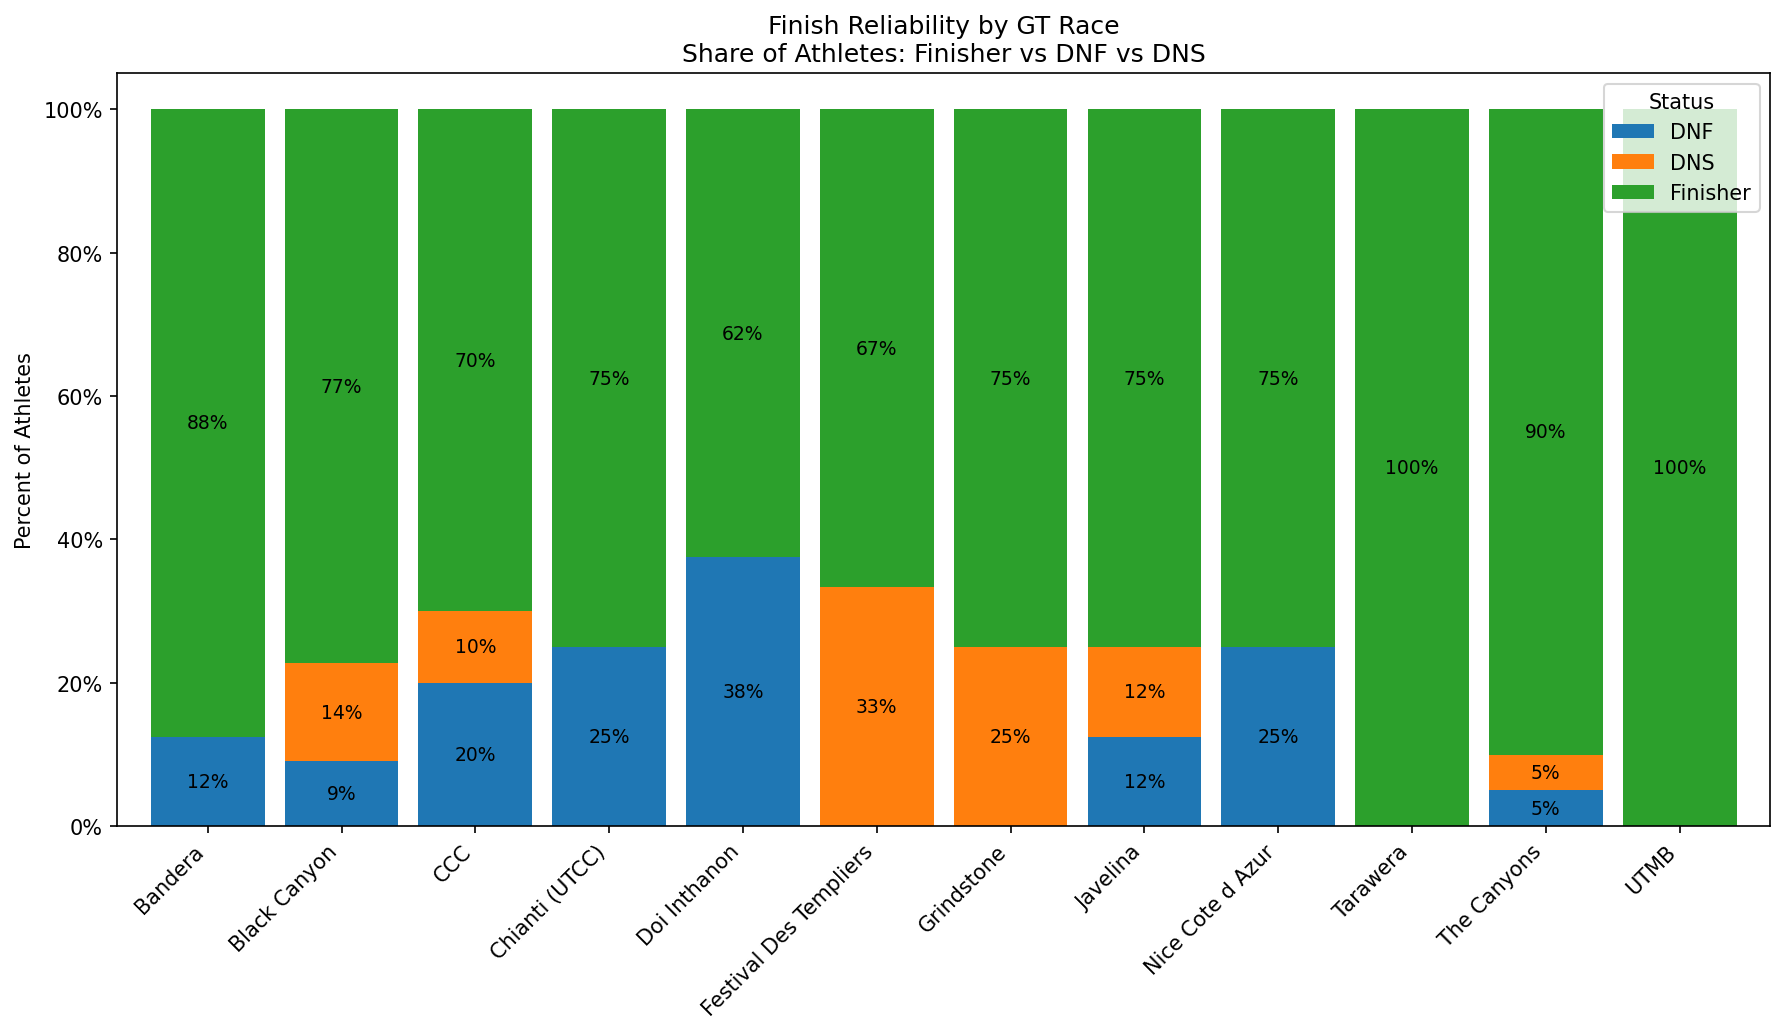

In [259]:
# ========== SLIDE 3: Finisher Reliability (Finisher / DNF / DNS) by GT race ==========
status_counts = (gt_norm
                 .groupby(['gt_race_name','ws_status'])
                 .size()
                 .unstack(fill_value=0)
                 .sort_index())

# 100% stacked percent frame
status_pct = status_counts.div(status_counts.sum(axis=1), axis=0)

fig = plt.figure(figsize=(12,7), dpi=150)
ax = fig.gca()
status_pct.plot(kind='bar', stacked=True, ax=ax, width=0.85)
ax.set_title('Finish Reliability by GT Race\nShare of Athletes: Finisher vs DNF vs DNS')
ax.set_xlabel('')
ax.set_ylabel('Percent of Athletes')
ax.legend(title = 'Status')
ax.set_xticklabels(status_pct.index, rotation=45, ha='right')
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
for container in ax.containers:
    labels = [f"{v:.0%}" if v>0 else "" for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=9)
plt.tight_layout()

plt.savefig('../python_images/finish_reliability_by_race_pct.png', dpi=300)

plt.show()

In [18]:
import pandas as pd
import numpy as np

# Load the master table (works directly in your environment since the file is attached)
df = pd.read_csv('../../data/master/golden_ticket_recipient_master_table.csv')

# Clean the data
# Convert flags to proper boolean
flag_columns = ['Finisher_Flag', 'DNF_Flag', 'DNS_Flag']
df[flag_columns] = df[flag_columns].replace({'TRUE': True, 'FALSE': False, True: True, False: False})

# Convert numeric columns
df['ws_rank'] = pd.to_numeric(df['ws_rank'], errors='coerce')
df['Gender_Rank'] = pd.to_numeric(df['Gender_Rank'], errors='coerce')
df['WS_Year'] = pd.to_numeric(df['WS_Year'], errors='coerce')

# Filter to completed Western States years only (2016–2025)
df = df[df['WS_Year'] <= 2025].copy()

# ===================================================================
# 1. FINISHER / DNF / DNS RATES
# ===================================================================

total_gt_entries = len(df)

finisher_rate = df['Finisher_Flag'].sum() / total_gt_entries * 100
dnf_rate = df['DNF_Flag'].sum() / total_gt_entries * 100
dns_rate = df['DNS_Flag'].sum() / total_gt_entries * 100

print("=== OVERALL RATES (2016–2025) ===")
print(f"Total Golden Ticket Recipients who had WS entry: {total_gt_entries}")
print(f"Finisher rate : {finisher_rate:.1f}% ({df['Finisher_Flag'].sum()} finishers)")
print(f"DNF rate      : {dnf_rate:.1f}% ({df['DNF_Flag'].sum()} DNFs)")
print(f"DNS rate      : {dns_rate:.1f}% ({df['DNS_Flag'].sum()} DNS)\n")

# Yearly breakdown
yearly = df.groupby('WS_Year').agg(
    Total_GT=('Name', 'count'),
    Finishers=('Finisher_Flag', 'sum'),
    DNFs=('DNF_Flag', 'sum'),
    DNSs=('DNS_Flag', 'sum')
).reset_index()

yearly['Finish_Rate_%'] = yearly['Finishers'] / yearly['Total_GT'] * 100
yearly['DNF_Rate_%'] = yearly['DNFs'] / yearly['Total_GT'] * 100
yearly['DNS_Rate_%'] = yearly['DNSs'] / yearly['Total_GT'] * 100

print("=== YEARLY RATES ===")
print(yearly[['WS_Year', 'Total_GT', 'Finish_Rate_%', 'DNF_Rate_%', 'DNS_Rate_%']].round(1).to_string(index=False))

# By gender
gender = df.groupby('Gender').agg(
    Total=('Name', 'count'),
    Finishers=('Finisher_Flag', 'sum'),
    DNFs=('DNF_Flag', 'sum'),
    DNSs=('DNS_Flag', 'sum')
).reset_index()

gender['Finish_Rate_%'] = gender['Finishers'] / gender['Total'] * 100
gender['DNF_Rate_%'] = gender['DNFs'] / gender['Total'] * 100
gender['DNS_Rate_%'] = gender['DNSs'] / gender['Total'] * 100

print("\n=== RATES BY GENDER ===")
print(gender[['Gender', 'Total', 'Finish_Rate_%', 'DNF_Rate_%', 'DNS_Rate_%']].round(1).to_string(index=False))


# ===================================================================
# 2. TOP 10 ANALYSIS (Overall ws_rank AND Gender_Rank)
# ===================================================================

finishers = df[df['Finisher_Flag'] == True].copy()

# A) Golden Ticket holders in Overall Top 10 (ws_rank <= 10)
top10_overall = finishers[finishers['ws_rank'] <= 10]

top10_overall_count = len(top10_overall)
top10_male_pct = (top10_overall['Gender'] == 'M').mean() * 100 if len(top10_overall) > 0 else 0
top10_female_pct = (top10_overall['Gender'] == 'F').mean() * 100 if len(top10_overall) > 0 else 0

print("\n=== GT HOLDERS IN OVERALL TOP 10 (2016–2025) ===")
print(f"Total GT in Top 10 overall: {top10_overall_count}")
print(f"  → Men  : {top10_male_pct:.1f}% ({(top10_overall['Gender'] == 'M').sum()})")
print(f"  → Women: {top10_female_pct:.1f}% ({(top10_overall['Gender'] == 'F').sum()})\n")

# Yearly Top 10 overall split
top10_yearly = (finishers[finishers['ws_rank'] <= 10]
                .groupby(['WS_Year', 'Gender']).size()
                .unstack(fill_value=0))
top10_yearly['Total_GT_in_Top10'] = top10_yearly.sum(axis=1)
print("Yearly GT in Overall Top 10:\n", top10_yearly)


# B) Golden Ticket holders in Gender Top 10 (Gender_Rank <= 10)
top10_gender = finishers[finishers['Gender_Rank'] <= 10]

men_in_gender_top10 = len(top10_gender[top10_gender['Gender'] == 'M'])
women_in_gender_top10 = len(top10_gender[top10_gender['Gender'] == 'F'])

print("\n=== GT HOLDERS IN GENDER TOP 10 (2016–2025) ===")
print(f"Men's Top 10 placements by GT holders : {men_in_gender_top10}")
print(f"Women's Top 10 placements by GT holders: {women_in_gender_top10}\n")

# Yearly Gender Top 10
gender_top10_yearly = (finishers[finishers['Gender_Rank'] <= 10]
                       .groupby(['WS_Year', 'Gender']).size()
                       .unstack(fill_value=0))
gender_top10_yearly['Total_GT_in_Gender_Top10'] = gender_top10_yearly.sum(axis=1)
print("Yearly GT in Gender Top 10:\n", gender_top10_yearly)

=== OVERALL RATES (2016–2025) ===
Total Golden Ticket Recipients who had WS entry: 212
Finisher rate : 76.9% (163 finishers)
DNF rate      : 15.1% (32 DNFs)
DNS rate      : 8.0% (17 DNS)

=== YEARLY RATES ===
 WS_Year  Total_GT Finish_Rate_% DNF_Rate_% DNS_Rate_%
  2016.0        24          62.5  20.833333  16.666667
  2017.0        20          80.0       20.0        0.0
  2018.0        16         93.75       6.25        0.0
  2019.0        18     77.777778  22.222222        0.0
  2021.0        20          55.0       25.0       20.0
  2022.0        26     80.769231   3.846154  15.384615
  2023.0        28     85.714286  10.714286   3.571429
  2024.0        30     86.666667       10.0   3.333333
  2025.0        30          70.0       20.0       10.0

=== RATES BY GENDER ===
Gender  Total Finish_Rate_% DNF_Rate_% DNS_Rate_%
     F    107     75.700935  14.953271   9.345794
     M    105     78.095238  15.238095   6.666667

=== GT HOLDERS IN OVERALL TOP 10 (2016–2025) ===
Total GT in Top 

In [11]:
# Clean flags and key columns
df[['Finisher_Flag', 'DNF_Flag', 'DNS_Flag']] = df[['Finisher_Flag', 'DNF_Flag', 'DNS_Flag']].replace({'TRUE': True, 'FALSE': False})
df['ws_rank'] = pd.to_numeric(df['ws_rank'], errors='coerce')
df['WS_Year'] = pd.to_numeric(df['WS_Year'], errors='coerce')
df = df[df['WS_Year'] <= 2025].copy()  # Only completed years

# ===================================================================
# 1. YEARLY RATES BY GENDER (Finisher / DNF / DNS)
# ===================================================================

rates_by_year_gender = (df
    .groupby(['WS_Year', 'Gender'])
    .agg(
        Total_GT=('Name', 'count'),
        Finishers=('Finisher_Flag', 'sum'),
        DNFs=('DNF_Flag', 'sum'),
        DNSs=('DNS_Flag', 'sum')
    )
    .reset_index()
)

rates_by_year_gender['Finish_Rate_%'] = rates_by_year_gender['Finishers'] / rates_by_year_gender['Total_GT'] * 100
rates_by_year_gender['DNF_Rate_%']     = rates_by_year_gender['DNFs']     / rates_by_year_gender['Total_GT'] * 100
rates_by_year_gender['DNS_Rate_%']     = rates_by_year_gender['DNSs']     / rates_by_year_gender['Total_GT'] * 100

# Pivot for nice display
final_rates = rates_by_year_gender[['WS_Year', 'Gender', 'Total_GT', 'Finish_Rate_%', 'DNF_Rate_%', 'DNS_Rate_%']].round(1)

print("=== YEARLY FINISHER / DNF / DNS RATES BY GENDER (2016–2025) ===")
print(final_rates.to_string(index=False))

=== YEARLY FINISHER / DNF / DNS RATES BY GENDER (2016–2025) ===
 WS_Year Gender  Total_GT  Finish_Rate_%  DNF_Rate_%  DNS_Rate_%
  2016.0      F        12           58.3        16.7        25.0
  2016.0      M        12           66.7        25.0         8.3
  2017.0      F        11           72.7        27.3         0.0
  2017.0      M         9           88.9        11.1         0.0
  2018.0      F         8          100.0         0.0         0.0
  2018.0      M         8           87.5        12.5         0.0
  2019.0      F         9           88.9        11.1         0.0
  2019.0      M         9           66.7        33.3         0.0
  2021.0      F        10           60.0        10.0        30.0
  2021.0      M        10           50.0        40.0        10.0
  2022.0      F        13           92.3         0.0         7.7
  2022.0      M        13           69.2         7.7        23.1
  2023.0      F        14           78.6        14.3         7.1
  2023.0      M        14 

C:\Users\user\AppData\Local\Temp\ipykernel_18380\1339407852.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['Finisher_Flag', 'DNF_Flag', 'DNS_Flag']] = df[['Finisher_Flag', 'DNF_Flag', 'DNS_Flag']].replace({'TRUE': True, 'FALSE': False})


In [12]:
# ===================================================================
# 2. % OF THAT YEAR'S GOLDEN TICKET HOLDERS (BY GENDER) WHO FINISHED IN OVERALL TOP 10
# ===================================================================

finishers = df[df['Finisher_Flag'] == True].copy()

top10_by_year_gender = (finishers[finishers['ws_rank'] <= 10]
    .groupby(['WS_Year', 'Gender'])
    .size()
    .reset_index(name='GT_in_Top10')
)

# Merge back with total GT per year/gender to calculate %
merged = pd.merge(top10_by_year_gender, rates_by_year_gender[['WS_Year', 'Gender', 'Total_GT']],
                  on=['WS_Year', 'Gender'], how='right').fillna(0)

merged['GT_in_Top10'] = merged['GT_in_Top10'].astype(int)
merged['%_of_That_Gender_GT_in_Top10'] = (merged['GT_in_Top10'] / merged['Total_GT'] * 100).round(1)

result = merged[['WS_Year', 'Gender', 'Total_GT', 'GT_in_Top10', '%_of_That_Gender_GT_in_Top10']]
result = result.sort_values(['WS_Year', 'Gender'])

print("\n=== % OF GOLDEN TICKET HOLDERS (BY GENDER) WHO PLACED IN OVERALL TOP 10 ===")
print(result.to_string(index=False))


=== % OF GOLDEN TICKET HOLDERS (BY GENDER) WHO PLACED IN OVERALL TOP 10 ===
 WS_Year Gender  Total_GT  GT_in_Top10  %_of_That_Gender_GT_in_Top10
  2016.0      F        12            6                          50.0
  2016.0      M        12            4                          33.3
  2017.0      F        11            5                          45.5
  2017.0      M         9            2                          22.2
  2018.0      F         8            4                          50.0
  2018.0      M         8            2                          25.0
  2019.0      F         9            4                          44.4
  2019.0      M         9            3                          33.3
  2021.0      F        10            2                          20.0
  2021.0      M        10            4                          40.0
  2022.0      F        13            5                          38.5
  2022.0      M        13            5                          38.5
  2023.0      F        14 

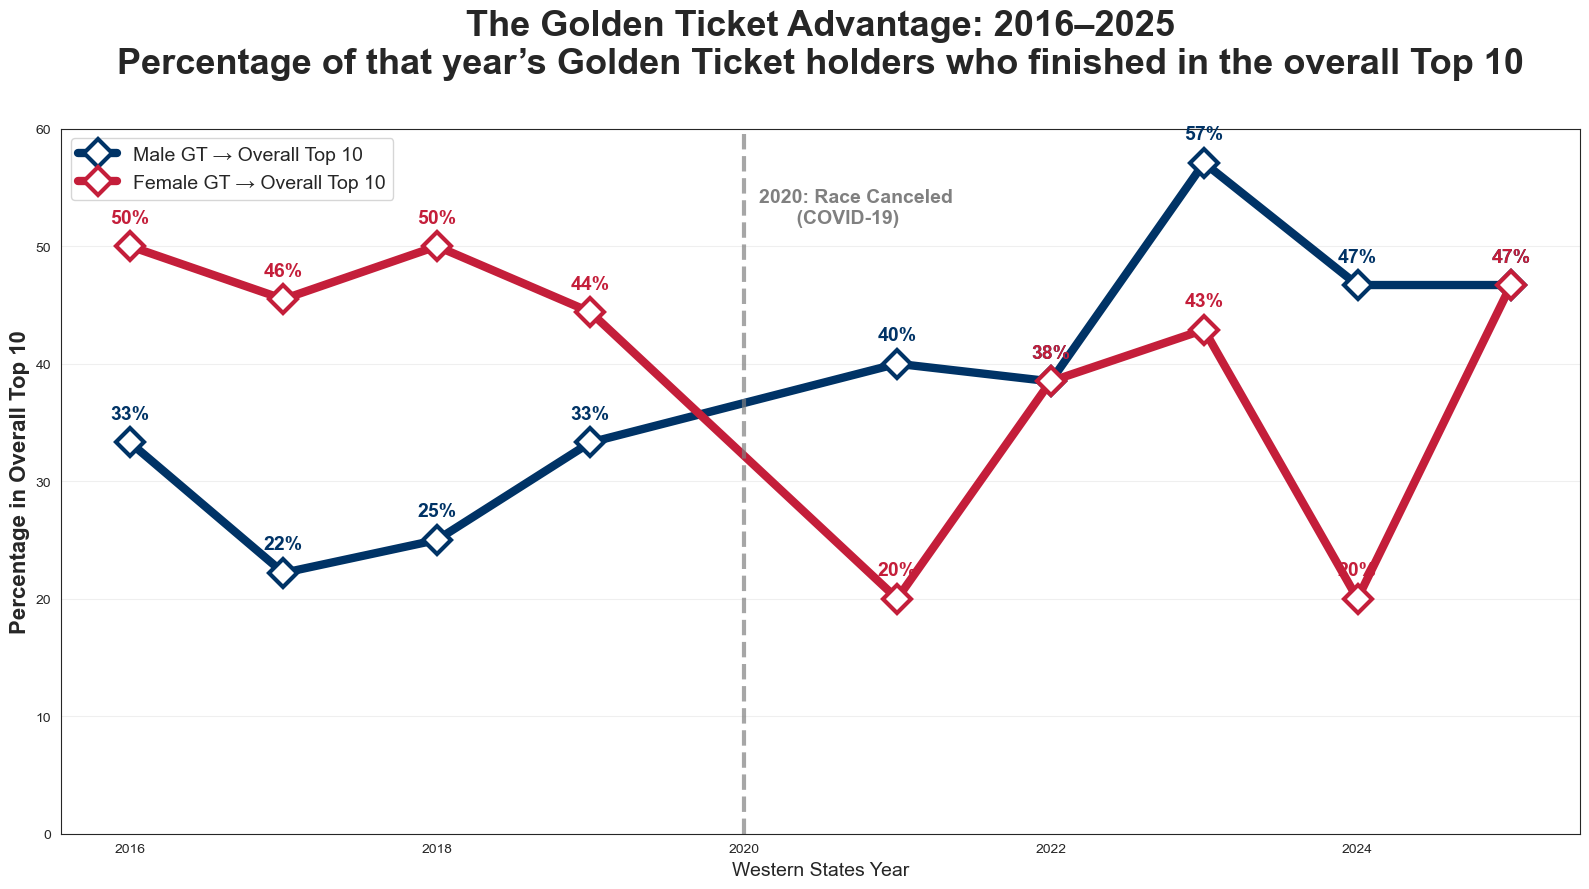

In [14]:
# FINAL, TRULY NORMALIZED VERSION – ONE AXIS, PURE IMPACT
plt.figure(figsize=(16, 9))
sns.set_style("white")

# Plot only the % in Top 10 – this is the real story
plt.plot(men.index, men['%_of_That_Gender_GT_in_Top10'],
         color='#003366', linewidth=6, marker='D', markersize=14,
         markerfacecolor='white', markeredgewidth=3, label='Male GT → Overall Top 10')
plt.plot(women.index, women['%_of_That_Gender_GT_in_Top10'],
         color='#c41e3a', linewidth=6, marker='D', markersize=14,
         markerfacecolor='white', markeredgewidth=3, label='Female GT → Overall Top 10')

# 2020 cancellation
plt.axvline(2020, color='gray', linestyle='--', linewidth=3, alpha=0.7)
plt.text(2020.1, 52, '2020: Race Canceled\n       (COVID-19)', 
         fontsize=14, color='gray', fontweight='bold')

# Title & labels
plt.title("The Golden Ticket Advantage: 2016–2025\n"
          "Percentage of that year’s Golden Ticket holders who finished in the overall Top 10",
          fontsize=26, fontweight='bold', pad=40)
plt.ylabel("Percentage in Overall Top 10", fontsize=16, fontweight='bold')
plt.xlabel("Western States Year", fontsize=14)

# Perfect 0–60% scale with matching ticks
plt.ylim(0, 60)
plt.yticks(range(0, 61, 10))
plt.grid(True, axis='y', alpha=0.3)

# Label every point
for year in men.index:
    if year != 2020:
        plt.text(year, men.loc[year, '%_of_That_Gender_GT_in_Top10'] + 2,
                 f"{men.loc[year, '%_of_That_Gender_GT_in_Top10']:.0f}%", 
                 ha='center', fontsize=14, fontweight='bold', color='#003366')
        plt.text(year, women.loc[year, '%_of_That_Gender_GT_in_Top10'] + 2,
                 f"{women.loc[year, '%_of_That_Gender_GT_in_Top10']:.0f}%", 
                 ha='center', fontsize=14, fontweight='bold', color='#c41e3a')

plt.legend(fontsize=14, loc='upper left')
plt.tight_layout()
# plt.savefig('Golden_Ticket_FINAL_TRUTH.png', dpi=400, bbox_inches='tight')
plt.show()